# Homework 1 (Total 30 points)

Remember -> submission using itslearning *deadline on 27.10.2023*

## Task 1 (5 points): Regression

##### Dataset: Superconductivity
* Number of records: 21263
* Number of features: 81 + 1 (target/output feature)
* Repository URL: https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data

##### Problems
__a.__ Train two regression models to predict the critical temperature. Report the score with the default parameters of each model.\
__b.__ Perform a simple manual optimization for one of the default parameters (at least 5 different values) and plot the new obtained scores as a function of the chosen parameter. Plot the coefficient magnitudes for the best obtained model.

In [4]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from tqdm.notebook import tqdm
import zipfile
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler, Normalizer, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from IPython.display import display, HTML
from sklearn import preprocessing


warnings.filterwarnings('ignore')

In [5]:
# import pyreadr
# from google.colab import drive
# drive.mount('/content/gdrive')

In [6]:
def download_and_extract(url, dest_folder):
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)

    zip_filename = os.path.join(dest_folder, "superconductivty_data.zip")

    # Download the dataset
    with requests.get(url, stream=True) as r:
        if r.status_code != 200:
            raise Exception(f"Failed to download the dataset. Status code: {r.status_code}")

        total_size = int(r.headers.get('content-length', 0))
        block_size = 1024
        t = tqdm(total=total_size, unit='iB', unit_scale=True, desc="Downloading")
        with open(zip_filename, 'wb') as f:
            for data in r.iter_content(block_size):
                t.update(len(data))
                f.write(data)
        t.close()

    print("Downloading: Done!")

    # Verify that the downloaded file is a zip file
    if not zipfile.is_zipfile(zip_filename):
        raise Exception("The downloaded file is not a valid zip file. Please check the URL and try again.")

    # Extract the zip file
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall(dest_folder)
        print("Extracting: Done!")

    # Clean up: Remove the zip file after extraction
    os.remove(zip_filename)

def load_superconductivity_data():
    current_dir = os.path.abspath('')
    dataset_dir = os.path.join(current_dir, "superconductivty_data")
    csv_file_path = os.path.join(dataset_dir, "train.csv")

    if not os.path.exists(csv_file_path):
        url = "https://archive.ics.uci.edu/static/public/464/superconductivty+data.zip"
        download_and_extract(url, dataset_dir)

    if not os.path.exists(csv_file_path):
        raise FileNotFoundError(f"The file {csv_file_path} does not exist. Download and extraction might have failed.")

    df = pd.read_csv(csv_file_path)
    return df

# Load the superconductivity dataset
df_superconductivty = load_superconductivity_data()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the Superconductivity dataset
# url = "/content/gdrive/My Drive/Colab Notebooks/superconductivty/train.csv"
# with  open(url,  encoding="utf8") as csv_file:
#   df_superconductivty= pd.read_csv(csv_file )

df_superconductivty.columns



Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [8]:
df_superconductivty.shape

(21263, 82)

In [9]:
df_superconductivty.head(10)

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   
5                   4         88.944468             57.795044   
6                   4         88.944468             57.682296   
7                   4         76.517718             57.175142   
8                   4         76.517718             56.808817   
9                   4         76.517718             56.442492   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   
5          66.361592              36.098926             1.181795   
6          66.361592              36.069470             1.181795   
7          59.310096              35.891368             1.197273   
8          59.310096              35.773432             1.197273   
9          59.310096              35.655884             1.197273   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   
5                 1.225203          122.90607              20.687458   
6                 1.316857          122.90607              10.765639   
7                 0.943560          122.90607              36.451199   
8                 0.981880          122.90607              34.833160   
9                 1.016495          122.90607              33.215121   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0        51.968828  ...          2.257143       2.213364           2.219783   
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   
5        51.968828  ...          2.214286       2.213364           2.181543   
6        51.968828  ...          2.142857       2.213364           2.119268   
7        44.289459  ...          2.271429       2.213364           2.232679   
8        44.289459  ...          2.264286       2.213364           2.226222   
9        44.289459  ...          2.257143       2.213364           2.219783   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0         1.368922             1.066221              1           1.085714   
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   
5         1.368922             1.141474              1           1.000000   
6         1.368922             1.194453              1           0.857143   
7         1.368922             1.029175              1           1.114286   
8         1.368922             1.048834              1           1.100000   
9         1.368922             1.066221              1           1.085714   

   std_Valence  wtd_std_Val

In [10]:
df_superconductivty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [11]:
# checkig duplicates values
df_superconductivty.duplicated().sum()
# df_superconductivty.isna()

66

In [12]:
# dropping duplicate values
df_superconductivty = df_superconductivty.drop_duplicates()

In [13]:
# check the uniq datatypes
df_superconductivty.dtypes.value_counts()

float64    79
int64       3
dtype: int64

In [14]:
df_superconductivty.describe()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
count        21197.000000      21197.000000          21197.000000   
mean             4.120300         87.544201             72.945331   
std              1.438282         29.643136             33.460789   
min              1.000000          6.941000              6.423452   
25%              3.000000         72.522475             52.143839   
50%              4.000000         84.922750             60.689236   
75%              5.000000        100.374260             85.982703   
max              9.000000        208.980400            208.980400   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
count       21197.000000           21197.000000         21197.000000   
mean           71.253164              58.474874             1.166782   
std            30.990774              36.615381             0.364712   
min             5.320573               1.960849             0.000000   
25%            58.041225              35.247208             0.972995   
50%            66.361592              39.873869             1.199541   
75%            78.019689              73.056021             1.444537   
max           208.980400             208.980400             1.983797   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
count             21197.000000       21197.000000           21197.000000   
mean                  1.065103         115.751945              33.204053   
std                   0.401225          54.584784              26.966285   
min                   0.000000           0.000000               0.000000   
25%                   0.781227          78.899680              16.799962   
50%                   1.148465         122.906070              26.601500   
75%                   1.360388         154.119320              38.336200   
max                   1.958203         207.972460             205.589910   

       std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  \
count     21197.000000  ...      21197.000000   21197.000000   
mean         44.436401  ...          3.148856       3.052542   
std          20.019732  ...          1.189878       1.044637   
min           0.000000  ...          1.000000       1.000000   
25%          32.890369  ...          2.116279       2.267933   
50%          45.123500  ...          2.605455       2.615321   
75%          59.356406  ...          4.007317       3.662842   
max         101.019700  ...          7.000000       7.000000   

       wtd_gmean_Valence  entropy_Valence  wtd_entropy_Valence  range_Valence  \
count       21197.000000     21197.000000         21197.000000   21197.000000   
mean            3.051485         1.297020             1.053977       2.042553   
std             1.173221         0.392834             0.380121       1.243242   
min             1.000000         0.000000             0.000000       0.000000   
25%             2.090896         1.060857             0.778998       1.000000   
50%             2.428047         1.368922             1.169665       2.000000   
75%             3.909523         1.589027             1.331531       3.000000   
max             7.000000         2.141963             1.949739       6.000000   

       wtd_range_Valence   std_Valence  wtd_std_Valence  critical_temp  
count       21197.000000  21197.000000     21197.000000   21197.000000  
mean            1.480890      0.839692         0.674168      34.494532  
std             0.977545      0.485002         0.456038      34.276465  
min             0.000000      0.000000         0.000000       0.000210  
25%             0.921250      0.451754         0.306892       5.380000  
50%             1.062857      0.800000         0.500000      20.000000  
75%             1.910400      1.200000         1.021023      63.000000  
max             6.992200      3.000000         3.000000     185.000000  

[8 rows x 82 columns]

The columns shows substantial variations in their means and standard deviations, signifying that they may assessed using distinct scales. It may affect models such as linear models but not tree based models.

In [15]:
# check null values
display(HTML(df_superconductivty.isnull().sum().to_frame('nulls').to_html()))

In [16]:
# Plotting the correlation heatmap:
corr_matrix = df_superconductivty.corr()

<Axes: >

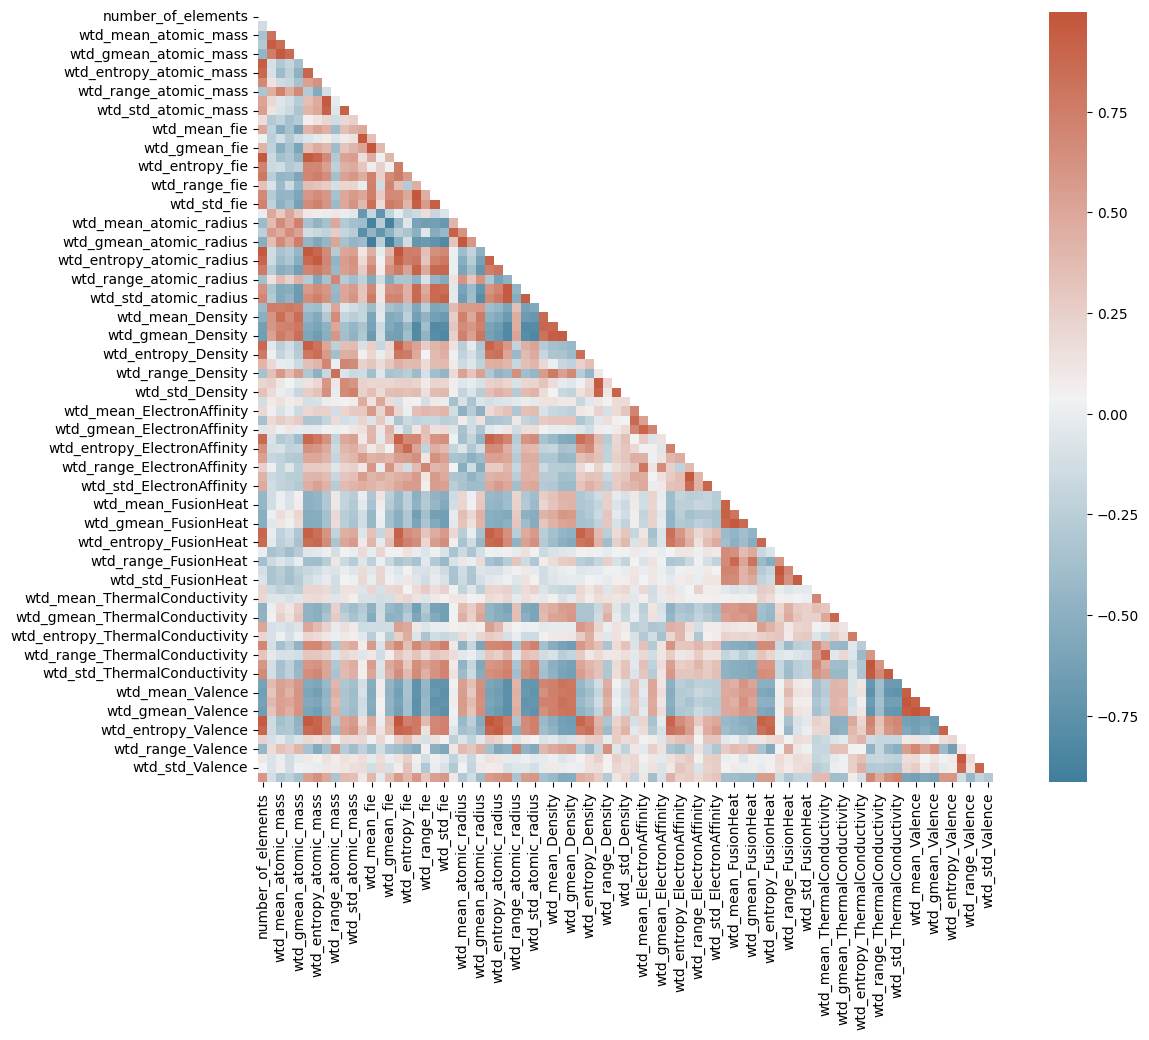

In [17]:
f, ax = plt.subplots(figsize=(12, 10))
# showing only the upper traingle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# custom diverging colormap
costom_color = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr_matrix, annot=False, mask = mask, cmap=costom_color)

As shown above, there is a substantial correlation among certain features, indicating that multiple independent variables in a model are interrelated. This correlation can potentially influence the performance of linear-based models. However, it exerts no influence on the effectiveness of tree-based models, ultimately leading to superior outcomes with this approach.

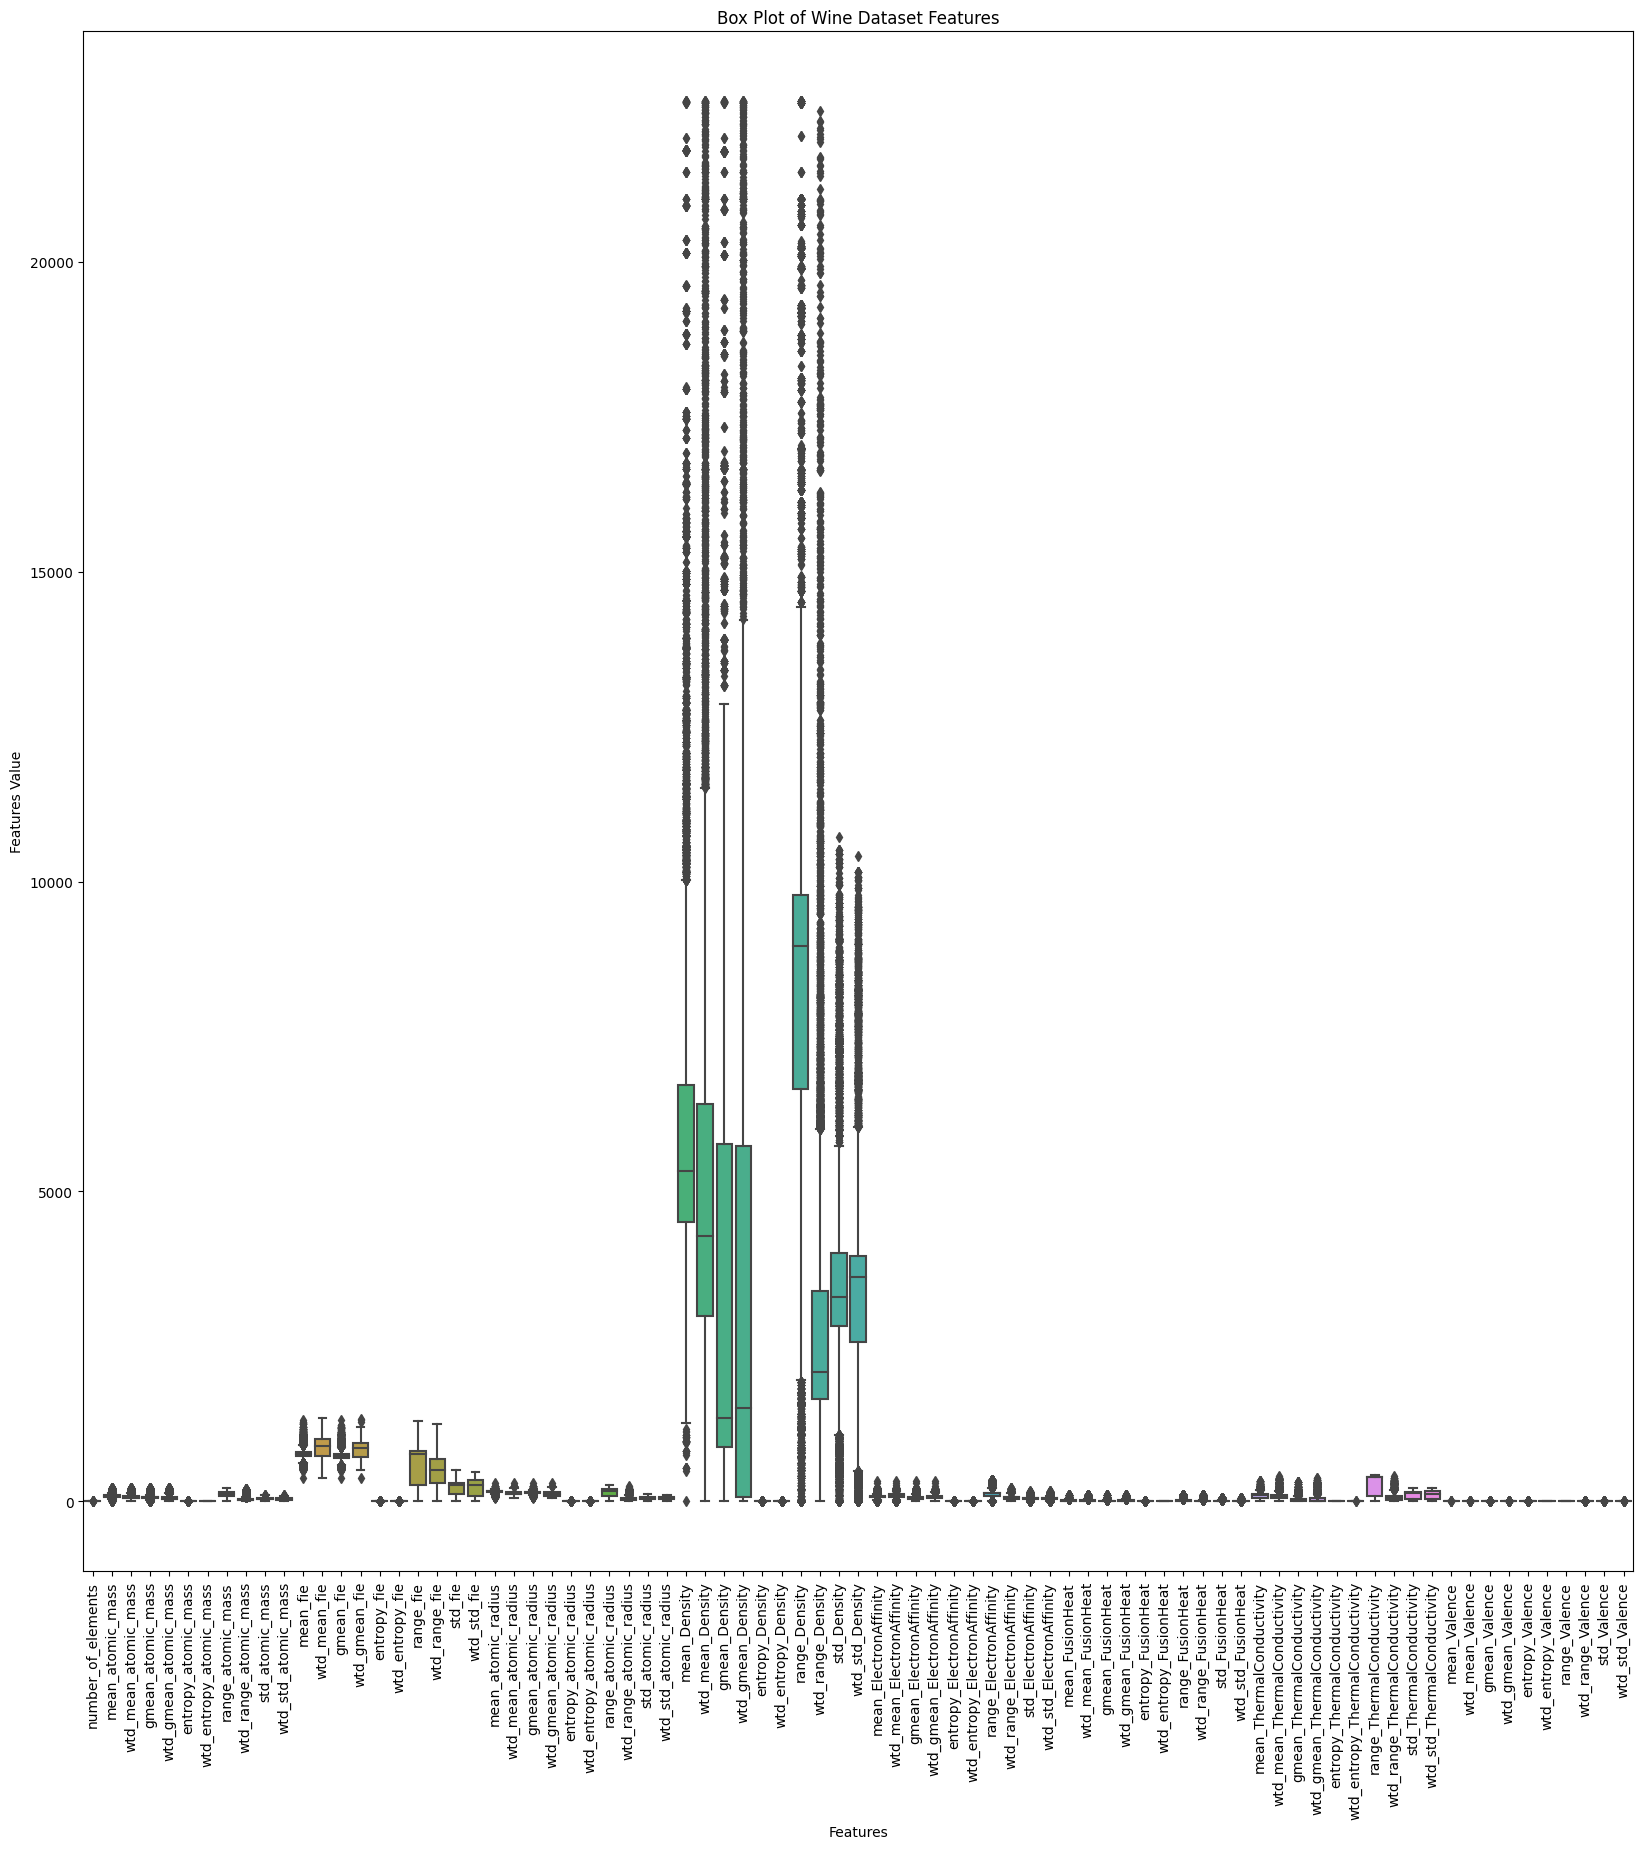

In [18]:
# exploring the outliers
import seaborn as sns
# Create a box plot to check the outliers
plt.figure(figsize=(20, 20))
sns.boxplot(data=df_superconductivty.iloc[:, :-1])
plt.title("Box Plot of Wine Dataset Features")
plt.xlabel("Features")
plt.ylabel("Features Value")
plt.xticks(rotation='vertical')
plt.show()

we have outliers in the data.

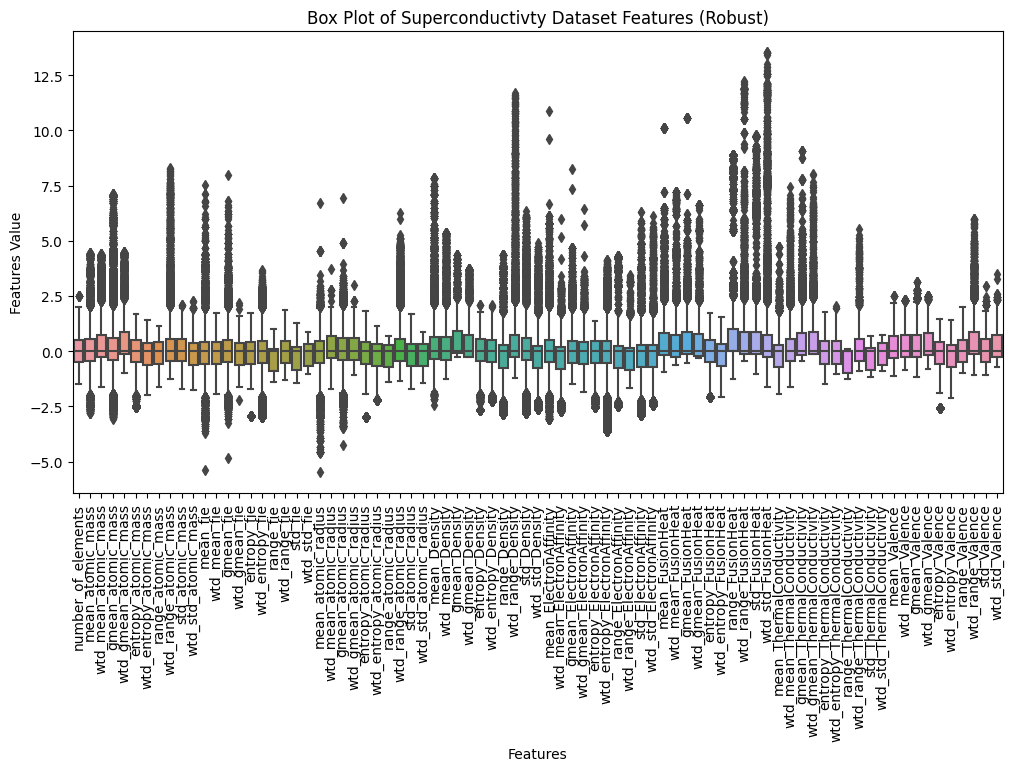

In [19]:
colm_list = df_superconductivty.iloc[:, :-1].columns

# Normalize data
rob_scaler = RobustScaler()
X_Robust = rob_scaler.fit_transform(df_superconductivty.iloc[:, :-1])


# Create a DataFrame for plotting with Seaborn
df_Robust = pd.DataFrame(X_Robust, columns=colm_list)

# Create a box plot after standardization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_Robust)
plt.title("Box Plot of Superconductivty Dataset Features (Robust)")
plt.xlabel("Features")
plt.ylabel("Features Value")
plt.xticks(rotation='vertical')

plt.show()

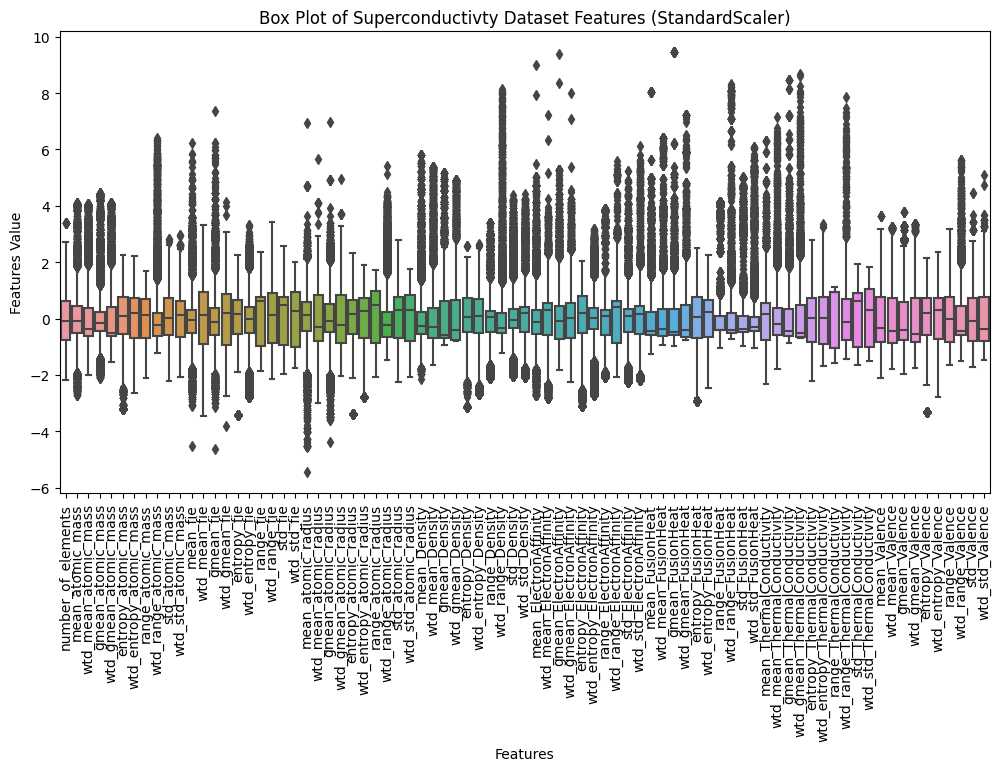

In [20]:

scaler = StandardScaler()
X_standardized = scaler.fit_transform(df_superconductivty.iloc[:, :-1])



# Create a DataFrame for plotting with Seaborn
df_standardized = pd.DataFrame(X_standardized, columns=colm_list)

# Create a box plot after standardization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_standardized)
plt.title("Box Plot of Superconductivty Dataset Features (StandardScaler)")
plt.xlabel("Features")
plt.ylabel("Features Value")
plt.xticks(rotation='vertical')

plt.show()

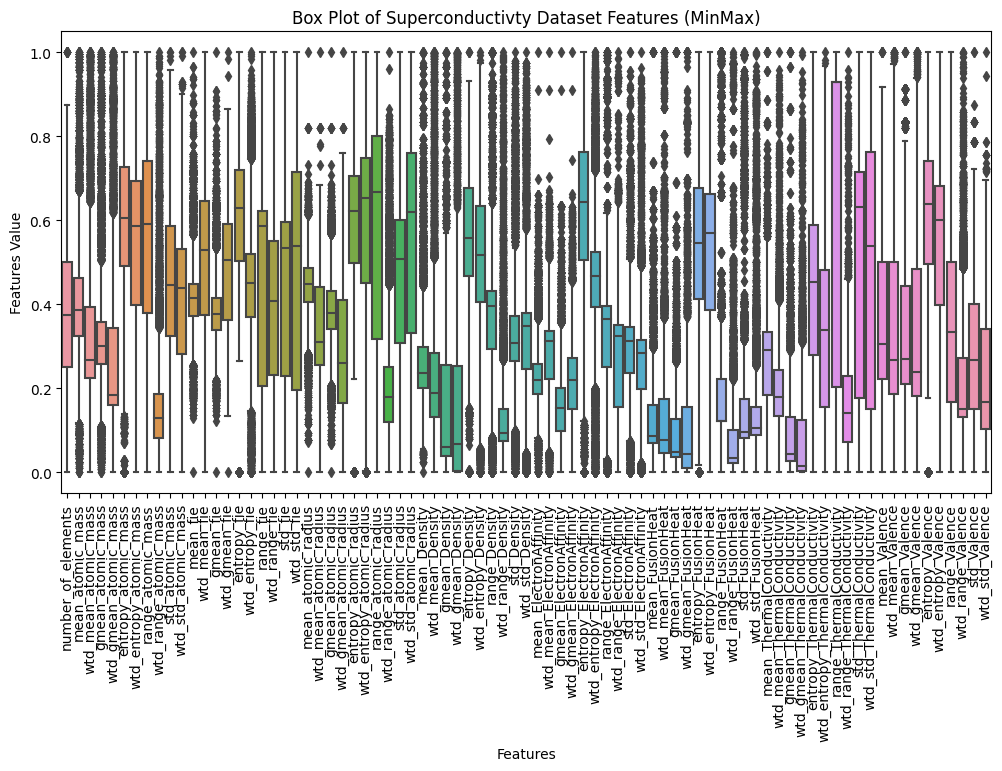

In [21]:
MinMax_scaler = MinMaxScaler()
X_MinMax  = MinMax_scaler.fit_transform(df_superconductivty.iloc[:, :-1])



# Create a DataFrame for plotting with Seaborn
df_MinMax = pd.DataFrame(X_MinMax, columns=colm_list)

# Create a box plot after standardization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_MinMax)
plt.title("Box Plot of Superconductivty Dataset Features (MinMax)")
plt.xlabel("Features")
plt.ylabel("Features Value")
plt.xticks(rotation='vertical')

plt.show()

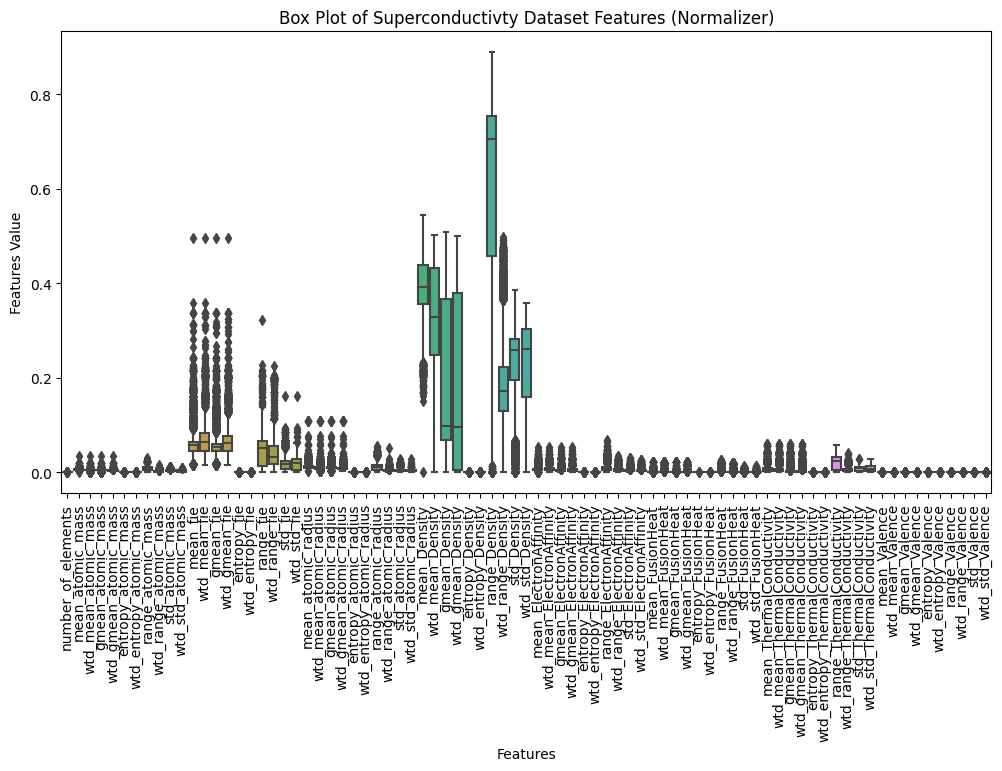

In [22]:
Normalizer_scaler = Normalizer()
X_Normalizer  = Normalizer_scaler.fit_transform(df_superconductivty.iloc[:, :-1])

# Create a DataFrame for plotting with Seaborn
df_Normalizer = pd.DataFrame(X_Normalizer, columns=colm_list)

# Create a box plot after standardization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_Normalizer)
plt.title("Box Plot of Superconductivty Dataset Features (Normalizer)")
plt.xlabel("Features")
plt.ylabel("Features Value")
plt.xticks(rotation='vertical')

plt.show()

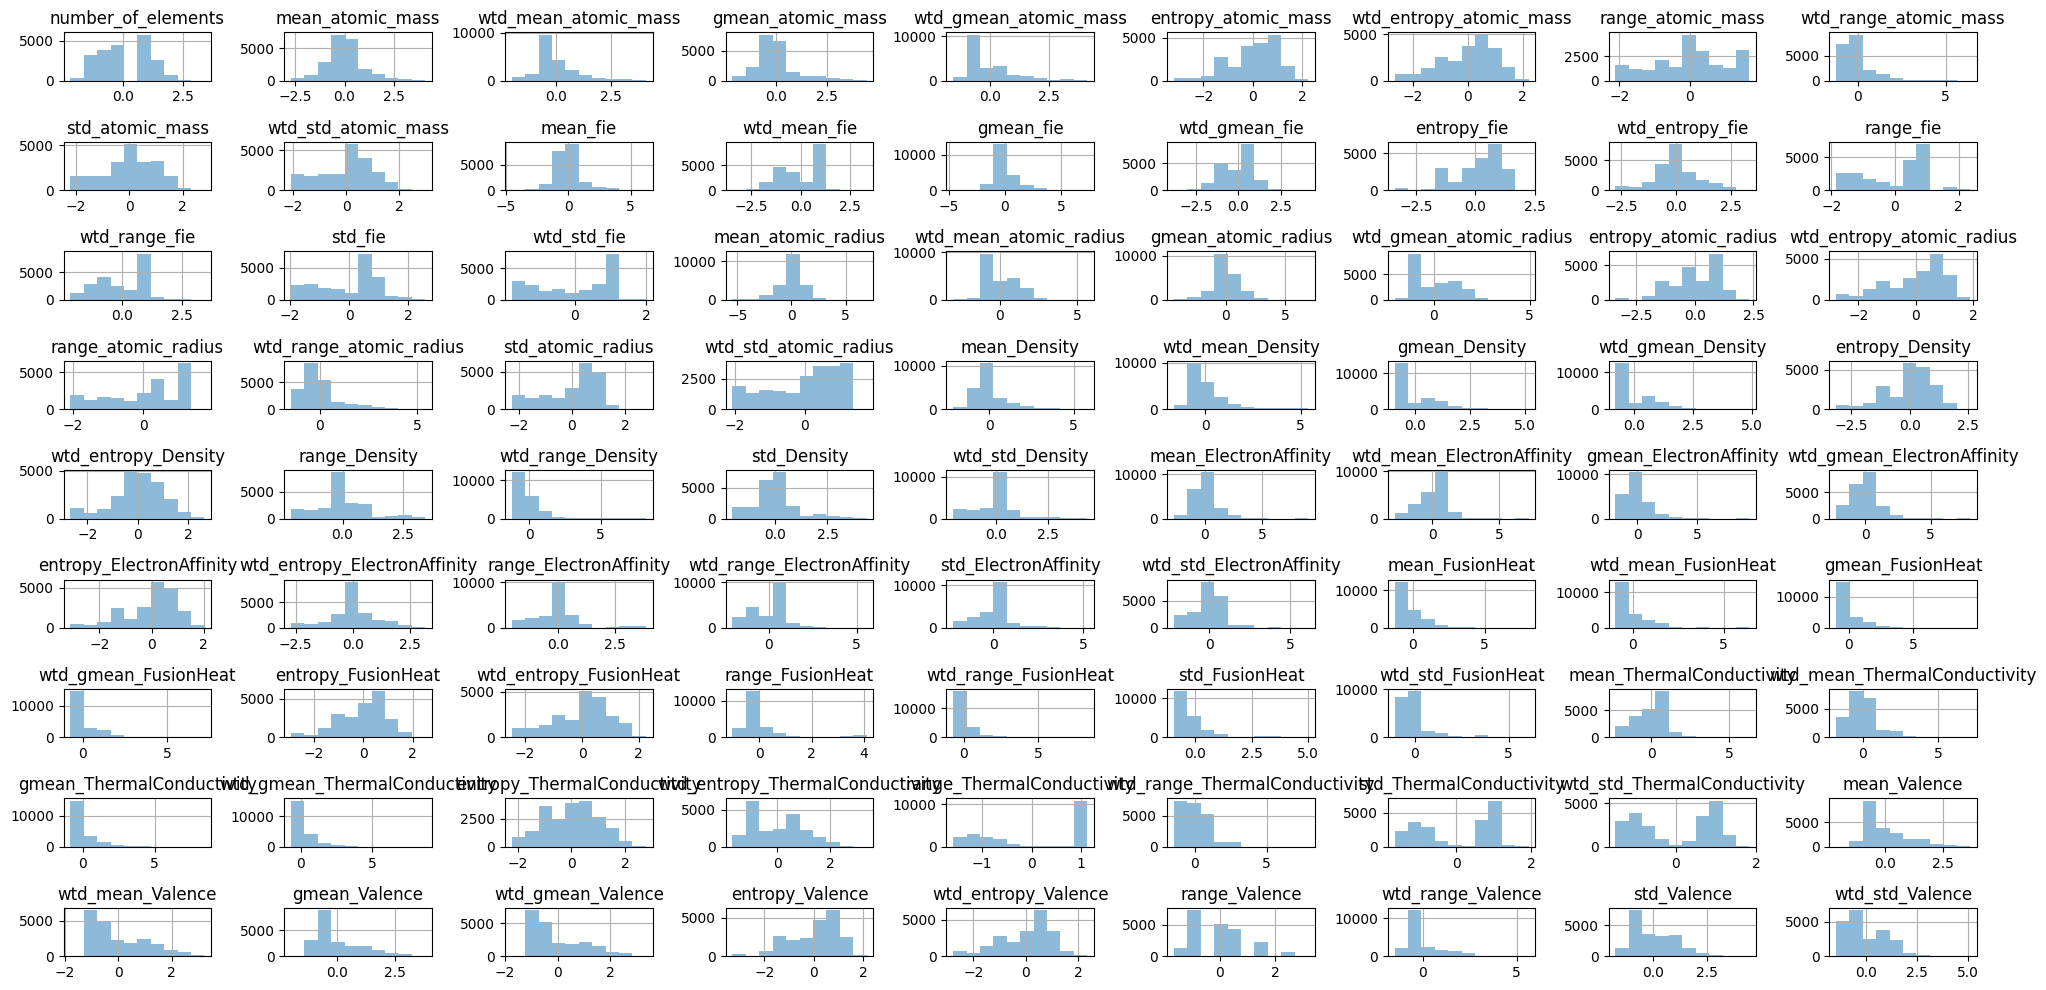

In [23]:
# plot histogram of the features after performing standardized scaler
hist = df_standardized.hist(alpha=0.5, figsize=(20, 10))
plt.tight_layout()
plt.show()

In [24]:
def remove_outliers(data , column, scaler_):
  df = data.copy()
  # calculate interquartile range
  percentile25 = df[column].quantile(0.25)
  percentile75 = df[column].quantile(0.75)

  # interquartile
  iqr= percentile75 - percentile25

  # calculate the outlier limits
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr

  # identify and remove the outliers
  df[column] = np.where(
      df[column] > upper_limit,
      upper_limit,
      np.where(
          df[column] < lower_limit,
          lower_limit,
          df[column]
      )
  )

  return(df)

We’re using linear regression models, which work best when the data follows a specific pattern. Our data has outliers and doesn’t form a nice bell-shaped curve. To keep things simple and make our models work better, we’ve decided to remove these outliers, even though there are more complex methods that could handle them.

In [25]:
# remove outliers for all the different scalers datasets
for col in colm_list:
  df_standardized = remove_outliers(df_standardized , col , 'standardized')
  df_Normalizer = remove_outliers(df_Normalizer , col , 'Normalizer')
  df_MinMax = remove_outliers(df_MinMax , col , 'MinMax')
  df_Robust = remove_outliers(df_Robust , col , 'Robust')


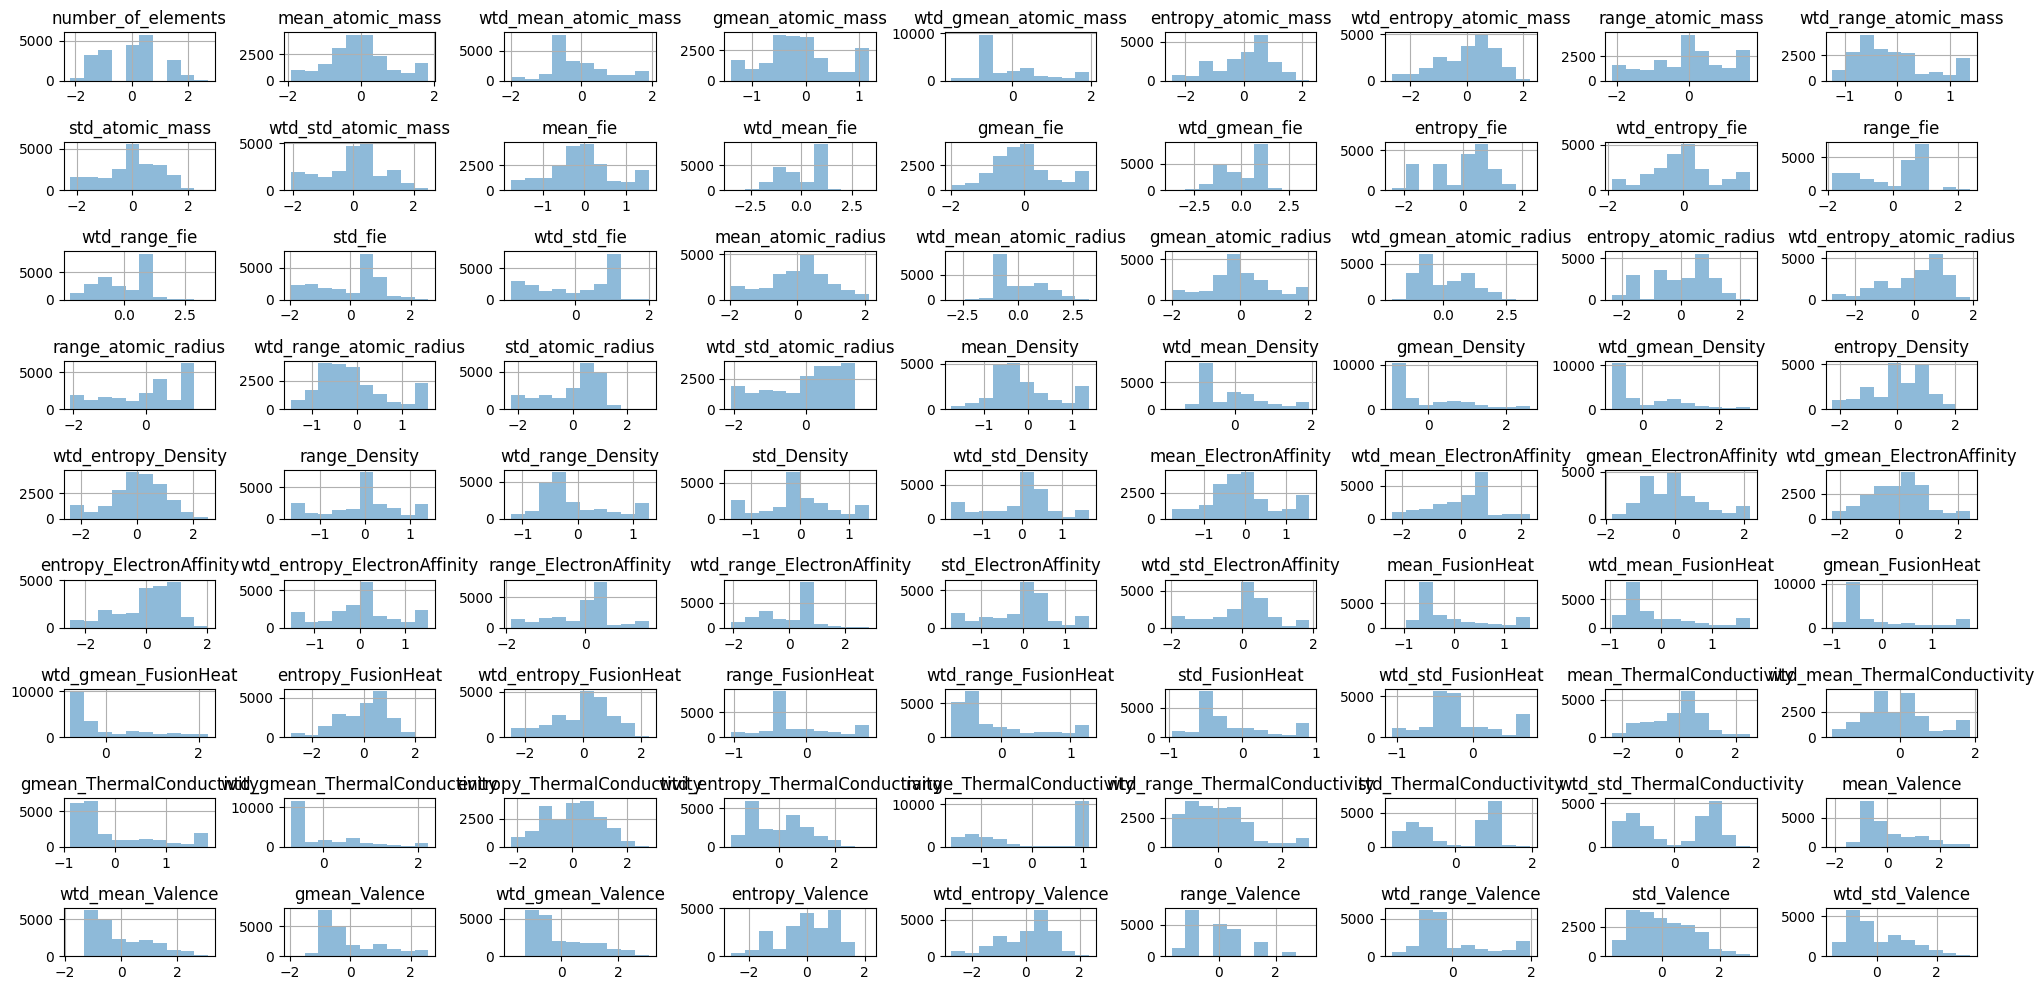

In [26]:
# plot histogram of the features after performing standardized scaler and outlier removal
hist = df_standardized.hist(alpha=0.5, figsize=(20, 10))
plt.tight_layout()
plt.show()

a. Train two regression models to predict the critical temperature. Report the score with the default parameters of each model.


In [27]:
# Split the dataset into features and target
X = df_standardized.values
y = df_superconductivty.iloc[:, -1].values
# scale labels
scaler_ = StandardScaler()
y_standardized = scaler_.fit_transform(y.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_standardized, test_size=0.2, random_state=42)

# Train a Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_score = linear_reg.score(X_test, y_test)

# Train a Random Forest Regressor model
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)
random_forest_score = random_forest.score(X_test, y_test)

print("Linear Regression Score: {:.4f}".format(linear_reg_score))
print("Random Forest Regressor Score: {:.4f}".format(random_forest_score))


Linear Regression Score: 0.7326
Random Forest Regressor Score: 0.9247


The 83 features of the Superconductivity Data are independent variables or predictor variables. These features are used to make predictions or infer information about the target variable, which is the critical temperature of superconductors in this dataset. In machine learning and statistical modeling, independent variables (or features) are the inputs used to predict the dependent variable (or target variable). In this case, the independent variables (the 83 features) are used to predict the critical temperature, making them independent variables.

AS it was also mentioned earlier, multicollinearity between some features leading to poor performance of the linear regression model. This correlation is a problem because independent variables should be independent. However, this issue does not have any impact on the tree-based models performance.

b. Perform a simple manual optimization for one of the default parameters (at least 5 different values).

In [28]:
# Define a range of values for the number of estimators
estimator_values = [10, 50, 100, 150, 200]
scores = []
coeff_magnitudes = []

for n_estimators in estimator_values:
    # Train a Random Forest Regressor with the chosen number of estimators
    random_forest = RandomForestRegressor(n_estimators=n_estimators)
    random_forest.fit(X_train, y_train)

    # Calculate the R-squared score
    score = random_forest.score(X_test, y_test)
    scores.append(score)

    # Calculate coefficient magnitudes (feature importances)
    coeff_magnitudes.append(random_forest.feature_importances_)




In [29]:
print("the best score is:", round(scores[np.argmax(scores)], 4))
print("the best estimators is:", estimator_values[np.argmax(scores)])

the best score is: 0.9258
the best estimators is: 150


As is shown above, by increasing the n_estimatorsint value (The number of trees in the forest) we got a better perfrmance of the model.

plot the new obtained scores as a function of the chosen parameter. Plot the coefficient magnitudes for the best obtained model.

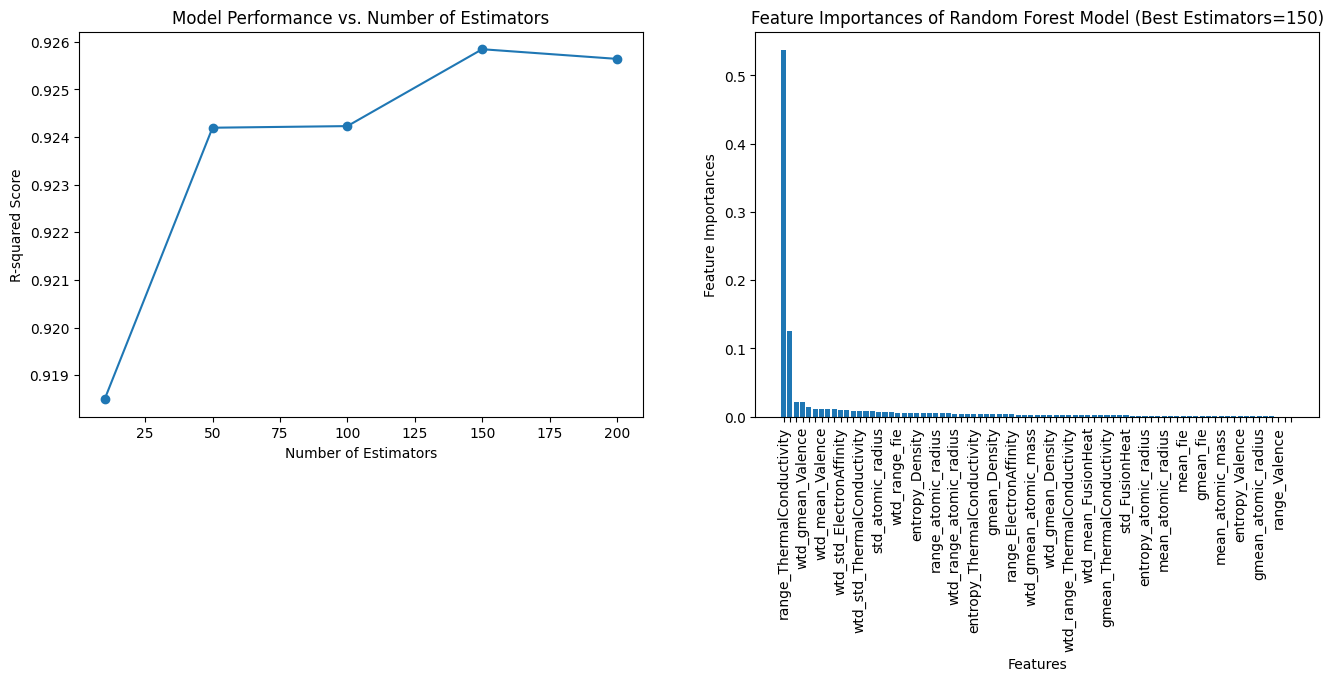

<Figure size 1500x500 with 0 Axes>

In [30]:
fig, axs = plt.subplots(1, 2 , figsize=(16,5))

# Plot scores as a function of the number of estimators
plt.figure(figsize=(15, 5))
axs[0].plot(estimator_values, scores, marker='o')
axs[1].set_xticks(estimator_values , labels = [10, 50, 100, 150, 200])
axs[0].set(xlabel='Number of Estimators', ylabel='R-squared Score');
axs[0].set_title("Model Performance vs. Number of Estimators");

# Get the feature importances from the Random Forest model
best_estimator_index = np.argmax(scores)
best_estimator = estimator_values[best_estimator_index]

# Get the feature names
feature_names = colm_list

# Sort feature importances in descending order
sorted_indices = coeff_magnitudes[best_estimator_index].argsort()[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importances = coeff_magnitudes[best_estimator_index][sorted_indices]

# Plot the feature importances
axs[1].bar(range(len(sorted_feature_names)), sorted_feature_importances)
axs[1].set_xticks(range(len(sorted_feature_names)), sorted_feature_names, rotation='vertical')
axs[1].set(xlabel='Features', ylabel='Feature Importances');
axs[1].set_title(f"Feature Importances of Random Forest Model (Best Estimators={best_estimator})");
every_nth = 3
for n, tick in enumerate(axs[1].xaxis.get_ticklabels()):
    if n % every_nth != 0:
        tick.set_visible(False)
plt.tight_layout();
plt.show();

In [31]:
# This dataframe shows the top 20 most important features
data = {'Feature':sorted_feature_names, 'Gain': sorted_feature_importances}
df_feature_importance = pd.DataFrame(data)
display(HTML(df_feature_importance.head(20).to_html()))

In the context of Random Forest regression, coefficient magnitudes work a bit differently compared to traditional linear models like linear regression. Random Forest is an ensemble learning method, and it doesn't provide coefficients for individual features like linear regression. However, we can still interpret feature importance using a different technique.

Random Forest provides a feature importance score for each feature, which is a measure of how much each feature contributes to the model's predictive performance. The higher the feature importance score, the more important that feature is for making predictions. The importance scores are often used in feature selection and interpretation.

In this excersise we used Feature Importance Scores: Random Forest assigns an importance score to each feature. These scores are calculated based on how much the feature contributes to reducing impurity or error in the model when making splits in the decision trees within the forest. Features that lead to a significant reduction in impurity or error during tree building are considered more important.

However, it is important to notice that while Random Forest feature importance is a valuable tool for understanding the model, it doesn't provide direct coefficients or information about the direction (positive or negative) of the relationship between features and the target variable. It's a way to understand which features the model relies on the most for making predictions.

## Task 2 (10 points): Multiclass & binary classification

##### Dataset:  Drug consumption (quantified)
* Number of records: 1885
* Number of features: 12 + 18 (target/output features)
* Repository URL: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29
* Reference: Fehrman, Elaine, Awaz K. Muhammad, Evgeny M. Mirkes, Vincent Egan, and Alexander N. Gorban. "The five factor model of personality and evaluation of drug consumption risk." In Data science: innovative developments in data analysis and clustering, pp. 231-242. Springer International Publishing, 2017.

##### Problems
__a.__ Select 2 out of 18 output features, then predict each selected feature by using a multiclass classification model. (Hint: Use numerical values to represent each class of an output feature) Report the accuracy with the default parameters of each model. (__Note__: two different multiclass classification models must be used) \
__b.__ Perform a simple manual optimization for one of the default parameters (at least 5 different values) for one of the previous models. Plot the obtained accuracy as a function of the chosen parameter. \
__c.__ Train one multiclass classification model to predict 16 output features (exclude 2 output features from a). Comment on the accuracy of predicting each feature, for all the 7 classes. \
__d.__ Run one binary classification model for 3 out of 18 output features. Evaluate the performance of the model with different setups as follows.
 - (class 0) the variables "Never Used" and "Used in Last Decade" and (class 1) the remaining variables.
 - (class 0) the variables "Never Used", "Used in Last Decade" and "Used in Last Year" and (class 1) the remaining variables.
 - (class 0) the variables "Never Used", "Used in Last Decade", "Used in Last Year" and "Used in Last Month" and (class 1) the remaining variables.

__NOTE__: Comment your results, and the best setups in d.

In [32]:
# Load the Drug Consumption dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data"
data = pd.read_csv(url, header=None)


In [33]:
data.shape

(1885, 32)

In [34]:
display(HTML(data.head(10).to_html()))

In [35]:
# define column names and show the top 10 first rows
data.columns =[str(x) for x in data.columns]
display(HTML(data.head(10).to_html()))

In [36]:
# drop column 0
data.drop(data.columns[[0]], axis=1, inplace=True)

In [37]:
display(HTML(data.head(10).to_html()))

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1885 non-null   float64
 1   2       1885 non-null   float64
 2   3       1885 non-null   float64
 3   4       1885 non-null   float64
 4   5       1885 non-null   float64
 5   6       1885 non-null   float64
 6   7       1885 non-null   float64
 7   8       1885 non-null   float64
 8   9       1885 non-null   float64
 9   10      1885 non-null   float64
 10  11      1885 non-null   float64
 11  12      1885 non-null   float64
 12  13      1885 non-null   object 
 13  14      1885 non-null   object 
 14  15      1885 non-null   object 
 15  16      1885 non-null   object 
 16  17      1885 non-null   object 
 17  18      1885 non-null   object 
 18  19      1885 non-null   object 
 19  20      1885 non-null   object 
 20  21      1885 non-null   object 
 21  22      1885 non-null   object 
 22  

In [39]:
# check null values
data.isnull().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
dtype: int64

In [40]:
# display the features
data.iloc[:, :-19]

1        2        3        4        5        6        7        8  \
0     0.49788  0.48246 -0.05921  0.96082  0.12600  0.31287 -0.57545 -0.58331   
1    -0.07854 -0.48246  1.98437  0.96082 -0.31685 -0.67825  1.93886  1.43533   
2     0.49788 -0.48246 -0.05921  0.96082 -0.31685 -0.46725  0.80523 -0.84732   
3    -0.95197  0.48246  1.16365  0.96082 -0.31685 -0.14882 -0.80615 -0.01928   
4     0.49788  0.48246  1.98437  0.96082 -0.31685  0.73545 -1.63340 -0.45174   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1880 -0.95197  0.48246 -0.61113 -0.57009 -0.31685 -1.19430  1.74091  1.88511   
1881 -0.95197 -0.48246 -0.61113 -0.57009 -0.31685 -0.24649  1.74091  0.58331   
1882 -0.07854  0.48246  0.45468 -0.57009 -0.31685  1.13281 -1.37639 -1.27553   
1883 -0.95197  0.48246 -0.61113 -0.57009 -0.31685  0.91093 -1.92173  0.29338   
1884 -0.95197 -0.48246 -0.61113  0.21128 -0.31685 -0.46725  2.12700  1.65653   

            9       10       11       12  
0    -0.91699 -0.00665 -0.21712 -1.18084  
1     0.76096 -0.14277 -0.71126 -0.21575  
2    -1.62090 -1.01450 -1.37983  0.40148  
3     0.59042  0.58489 -1.37983 -1.18084  
4    -0.30172  1.30612 -0.21712 -0.21575  
...       ...      ...      ...      ...  
1880  0.76096 -1.13788  0.88113  1.92173  
1881  0.76096 -1.51840  0.88113  0.76540  
1882 -1.77200 -1.38502  0.52975 -0.52593  
1883 -1.62090 -2.57309  1.29221  1.22470  
1884  1.11406  0.41594  0.88113  1.22470  

[1885 rows x 12 columns]

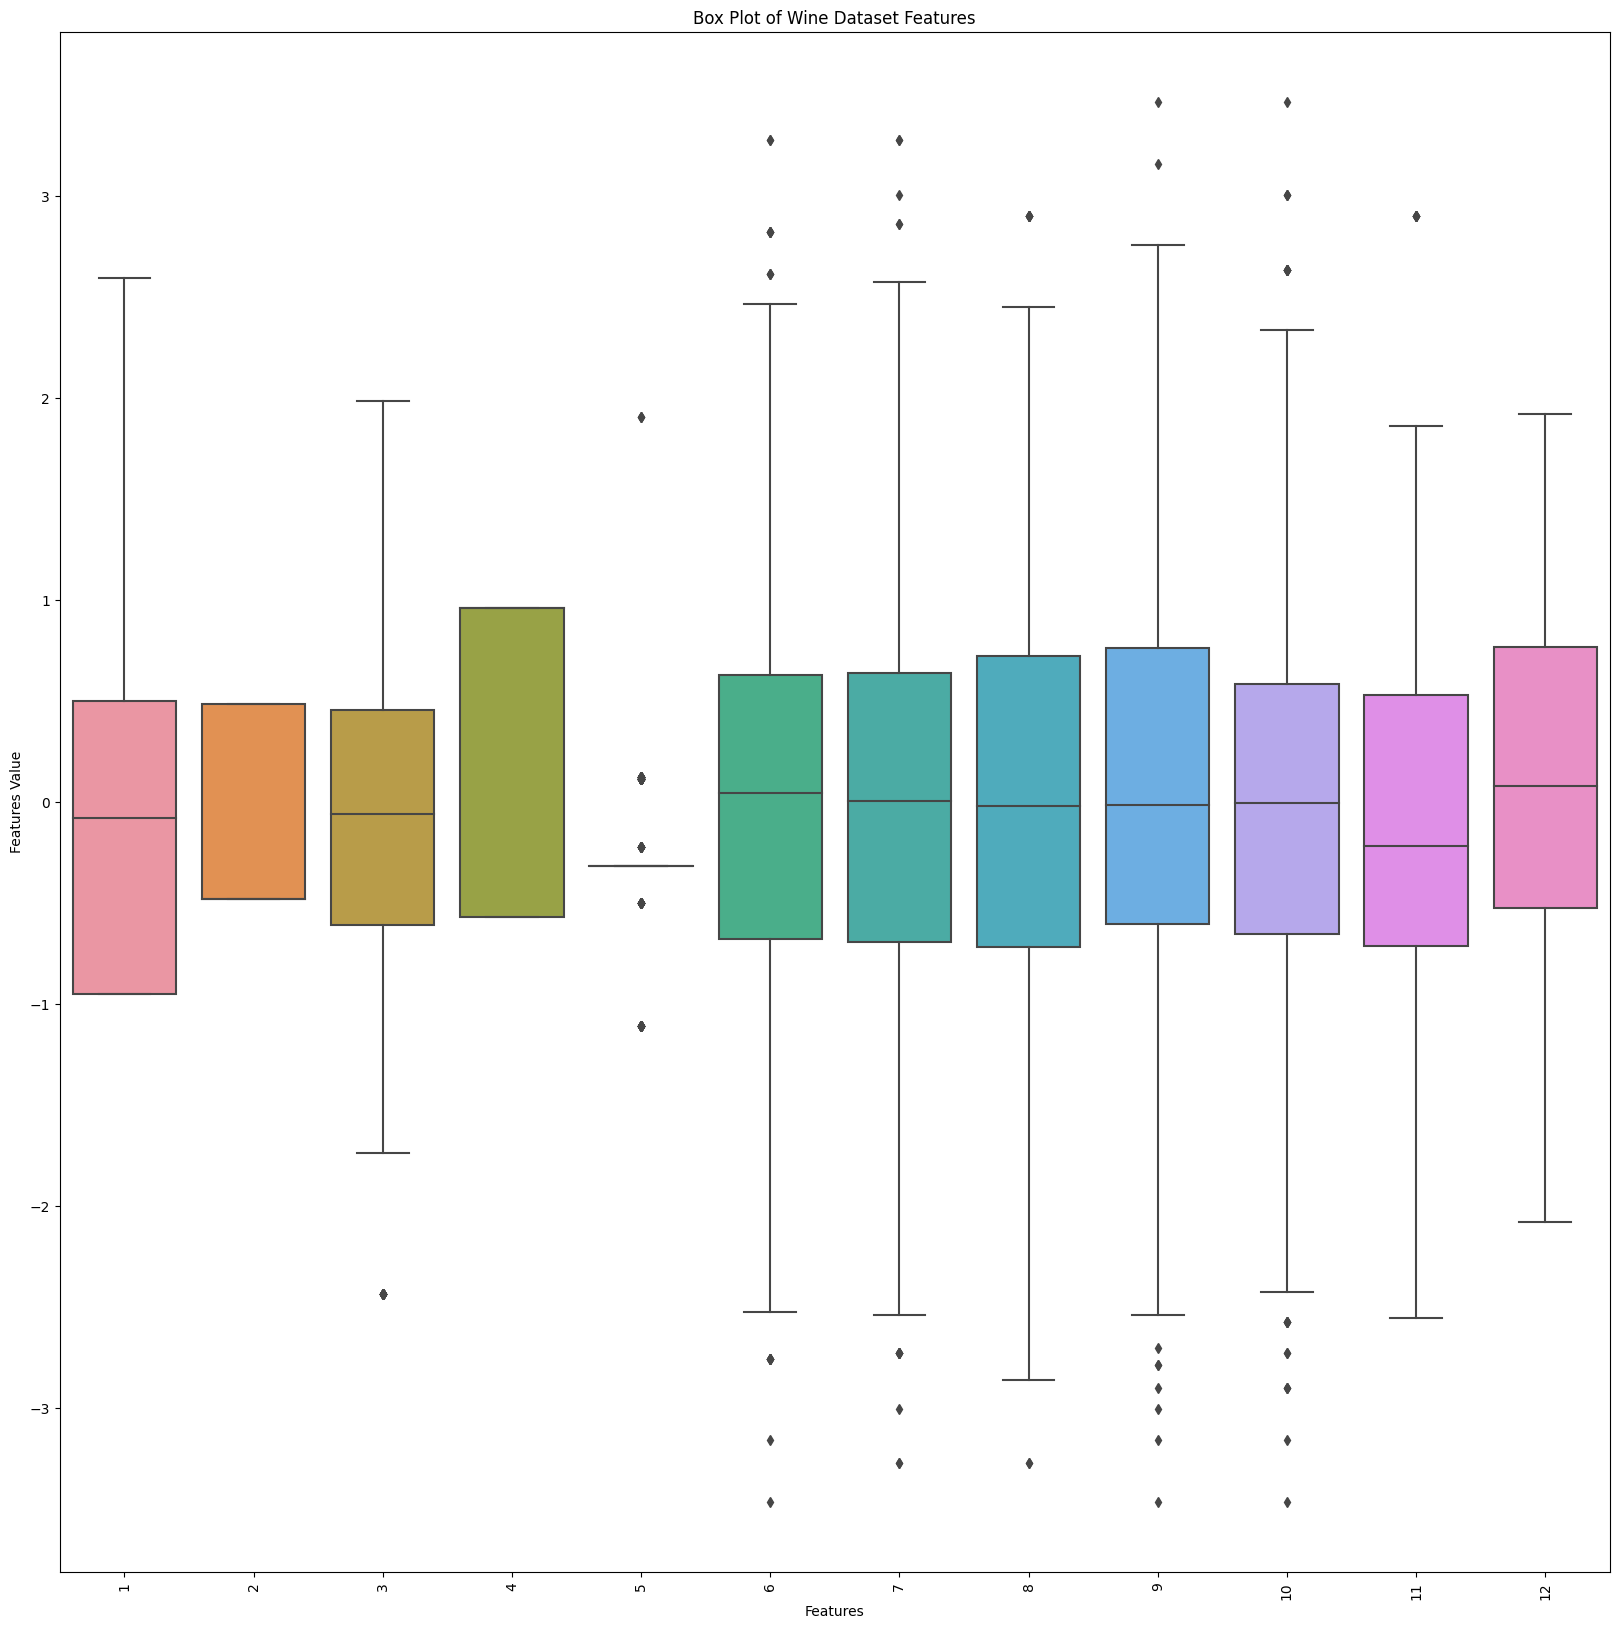

In [41]:
# Create a box plot to check the outliers
plt.figure(figsize=(20, 20))
sns.boxplot(data=data.iloc[:, :-19])
plt.title("Box Plot of Wine Dataset Features")
plt.xlabel("Features")
plt.ylabel("Features Value")
plt.xticks(rotation='vertical')
plt.show()

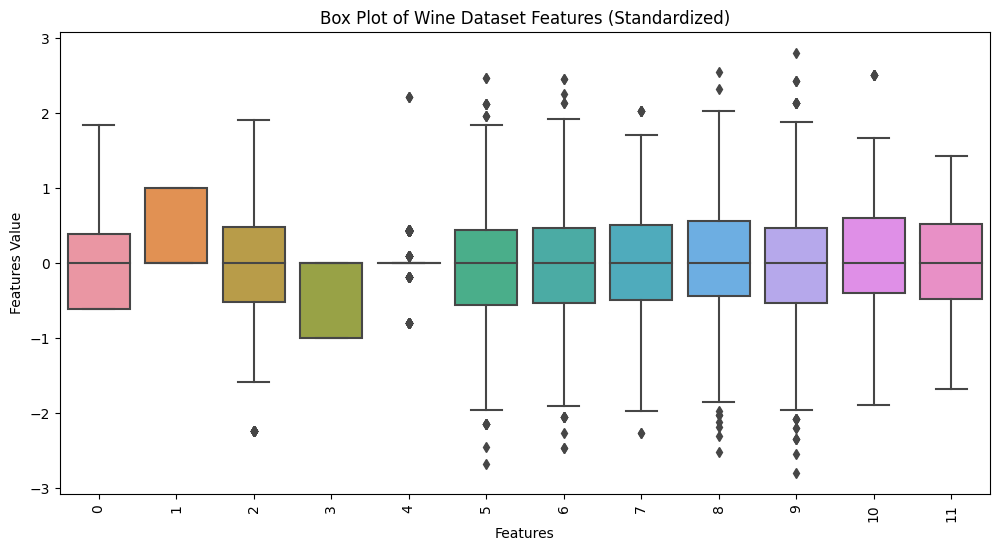

In [42]:
# Standardize the data
# from sklearn.preprocessing import StandardScaler

# standardized data
scaler = RobustScaler()
X_drug_Robust = scaler.fit_transform(data.iloc[:, :-19])


# Create a DataFrame for plotting with Seaborn
df_drug_Robust = pd.DataFrame(X_drug_Robust)
df_drug_Robust.columns =[str(x) for x in df_drug_Robust.columns]
# Create a box plot after standardization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_drug_Robust)
plt.title("Box Plot of Wine Dataset Features (Standardized)")
plt.xlabel("Features")
plt.ylabel("Features Value")
plt.xticks(rotation='vertical')

plt.show()

In [43]:
def remove_outliers(data , column):
  df = data.copy()
  # calculate interquartile range
  percentile25 = df[column].quantile(0.25)
  percentile75 = df[column].quantile(0.75)

  # interquartile
  iqr= percentile75 - percentile25

  # calculate the outlier limits
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr

  # identify and remove the outliers
  df[column] = np.where(
      df[column] > upper_limit,
      upper_limit,
      np.where(
          df[column] < lower_limit,
          lower_limit,
          df[column]
      )
  )
  plt.figure(figsize=(16,8))

  plt.subplot(2,2,1)
  plt.title(column + ': distplot with outliers')
  sns.distplot(data[column])

  plt.subplot(2,2,2)
  plt.title(column + ': boxplot with outliers')
  sns.boxplot(data[column])

  plt.subplot(2,2,3)
  plt.title(column + ': distplot without outliers')
  sns.distplot(df[column])

  plt.subplot(2,2,4)
  plt.title(column + ': boxplot without outliers')
  sns.boxplot(df[column])

  plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
  plt.show()
  return(df)

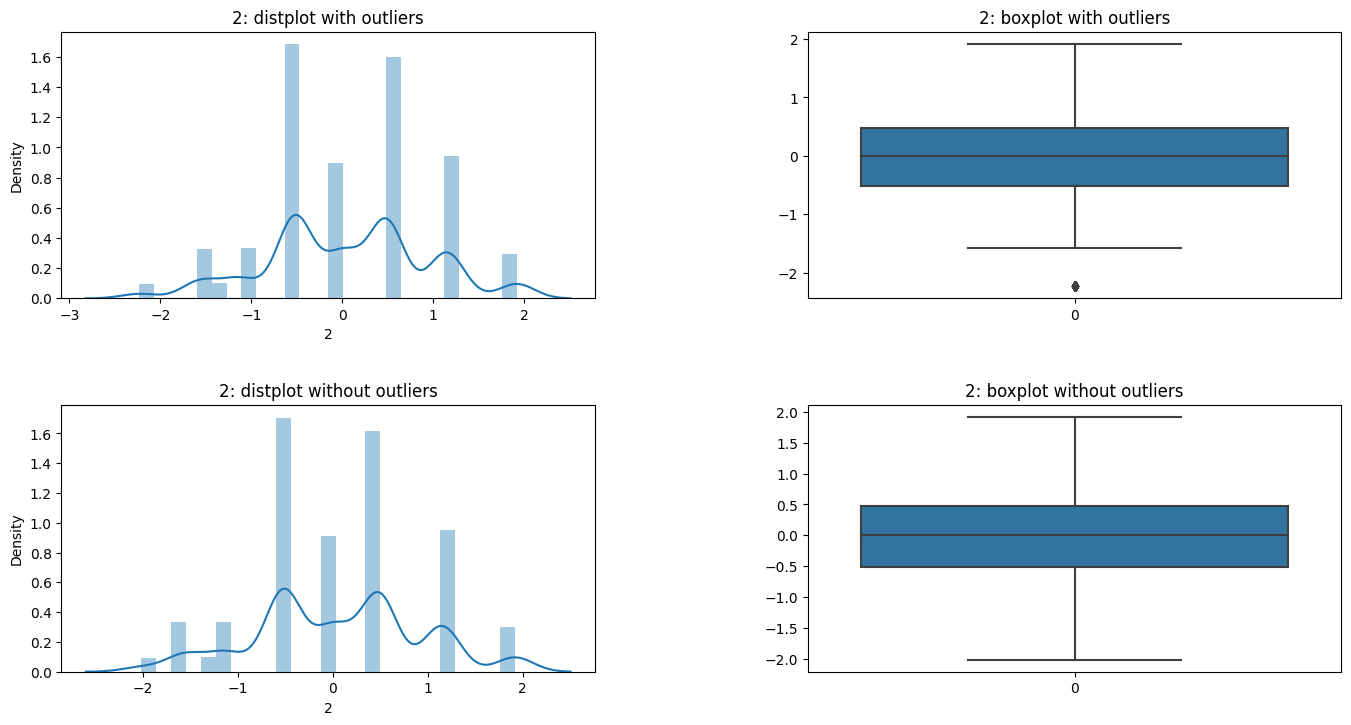

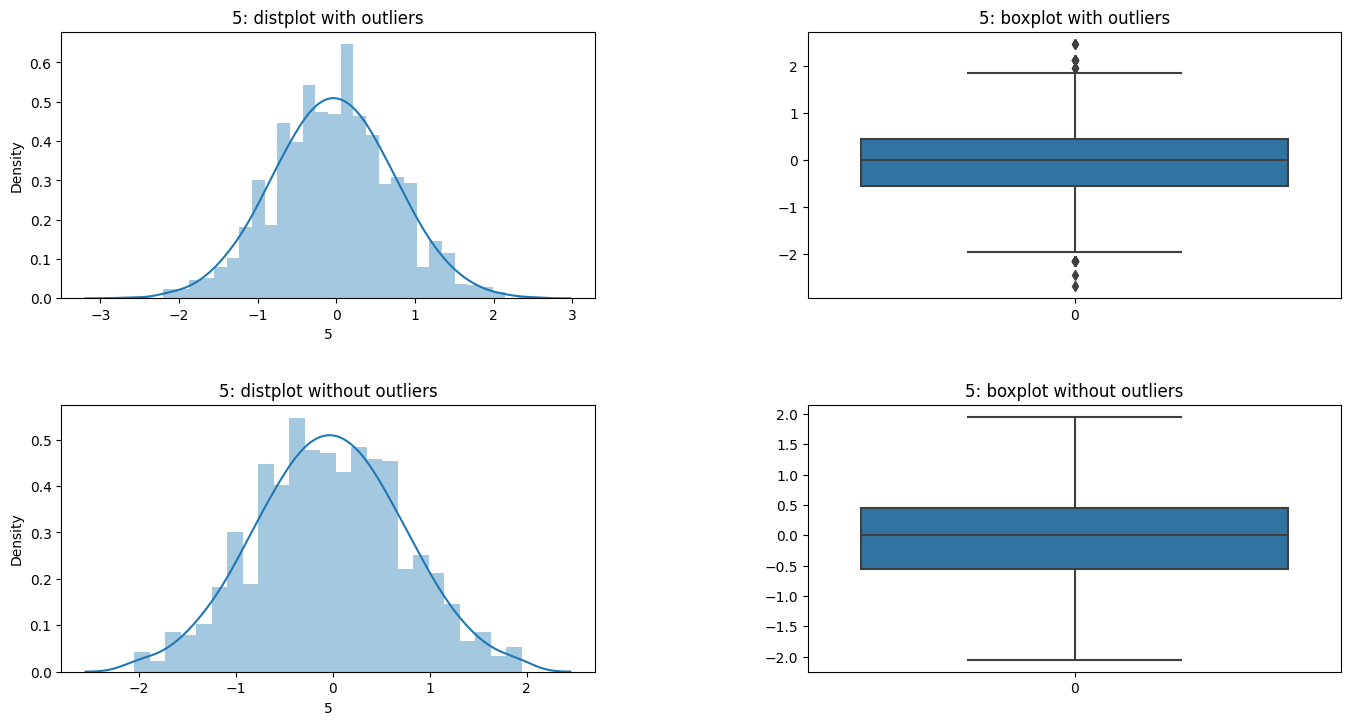

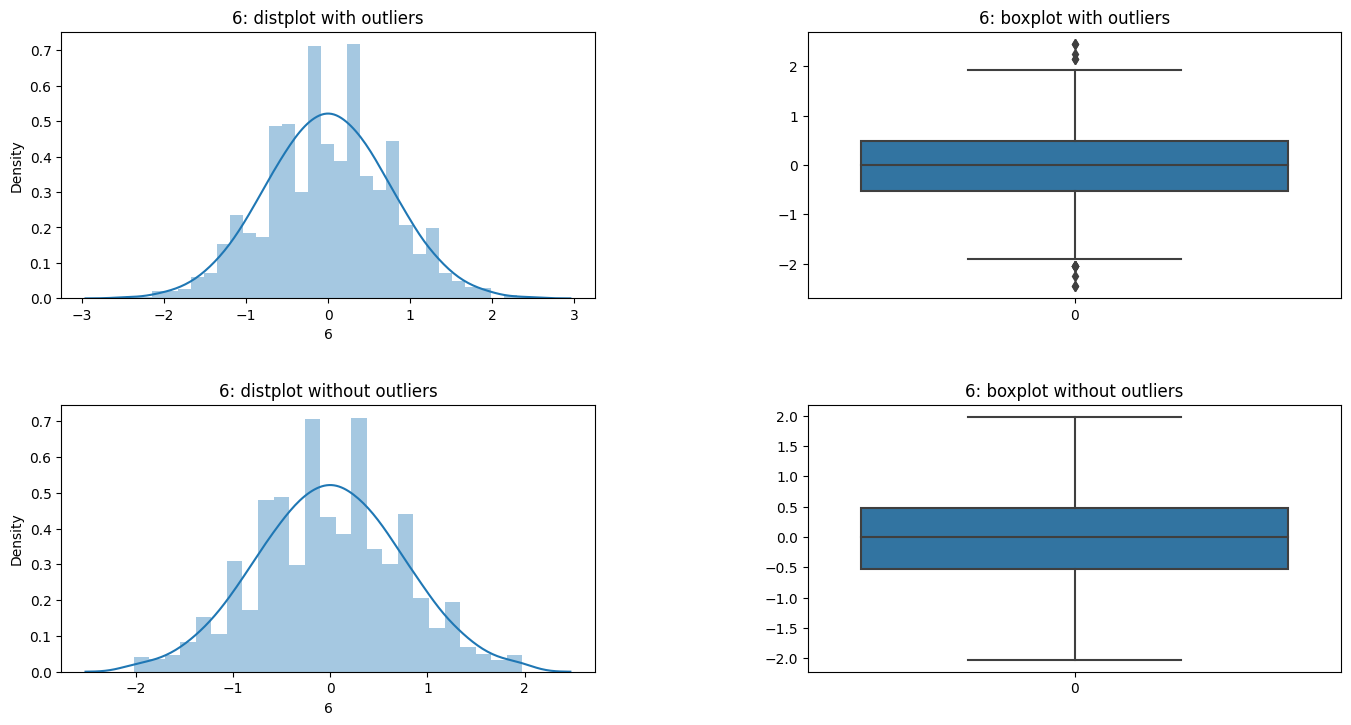

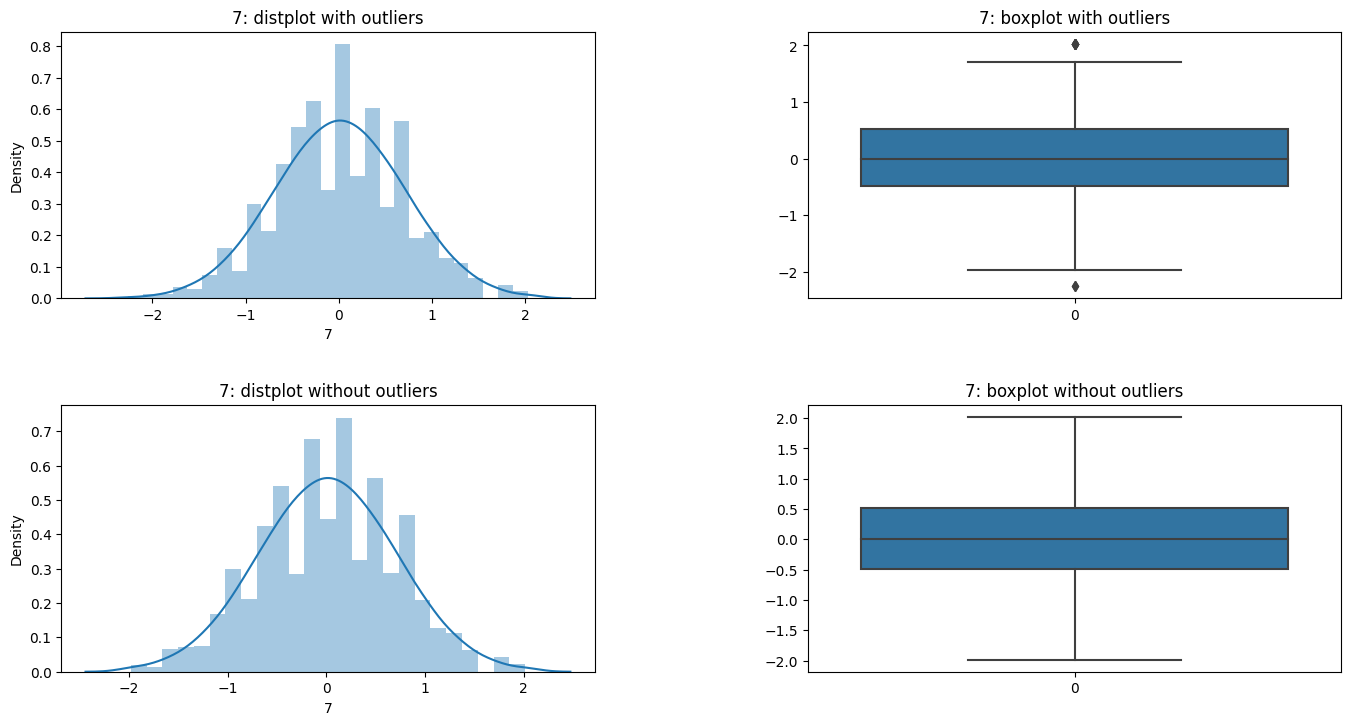

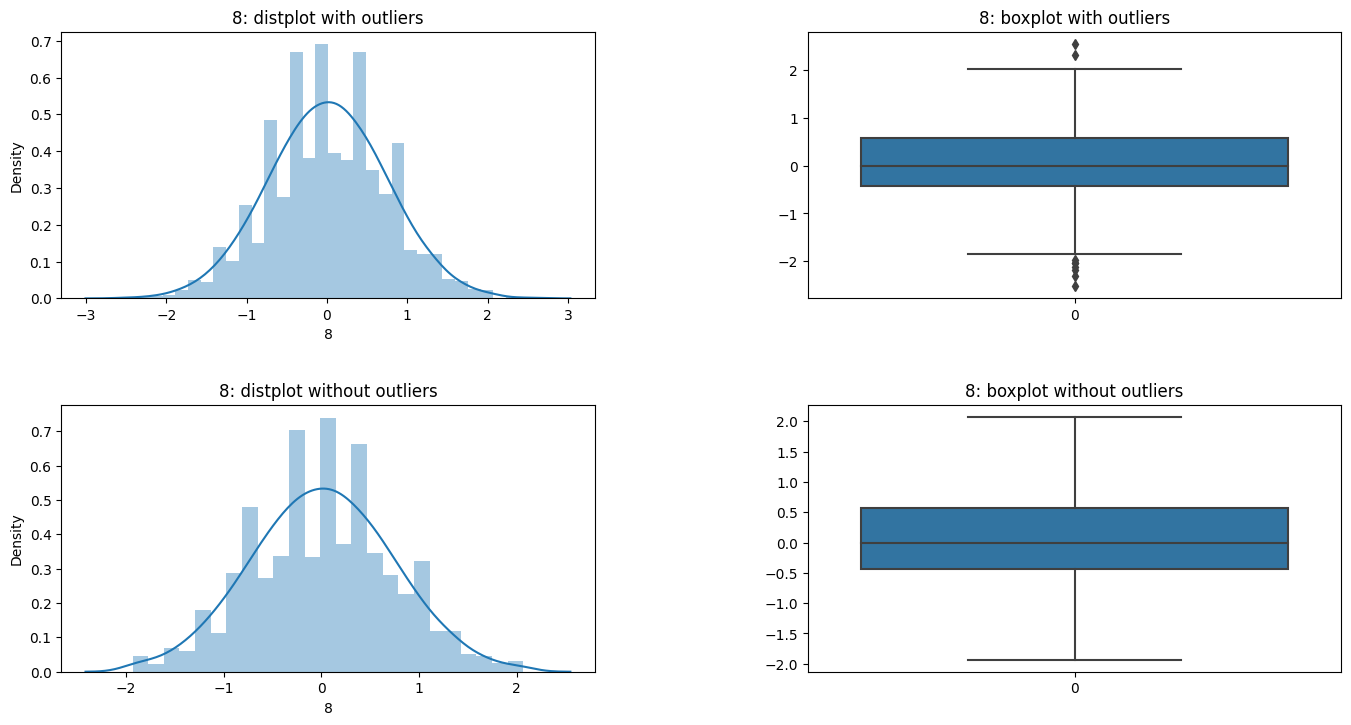

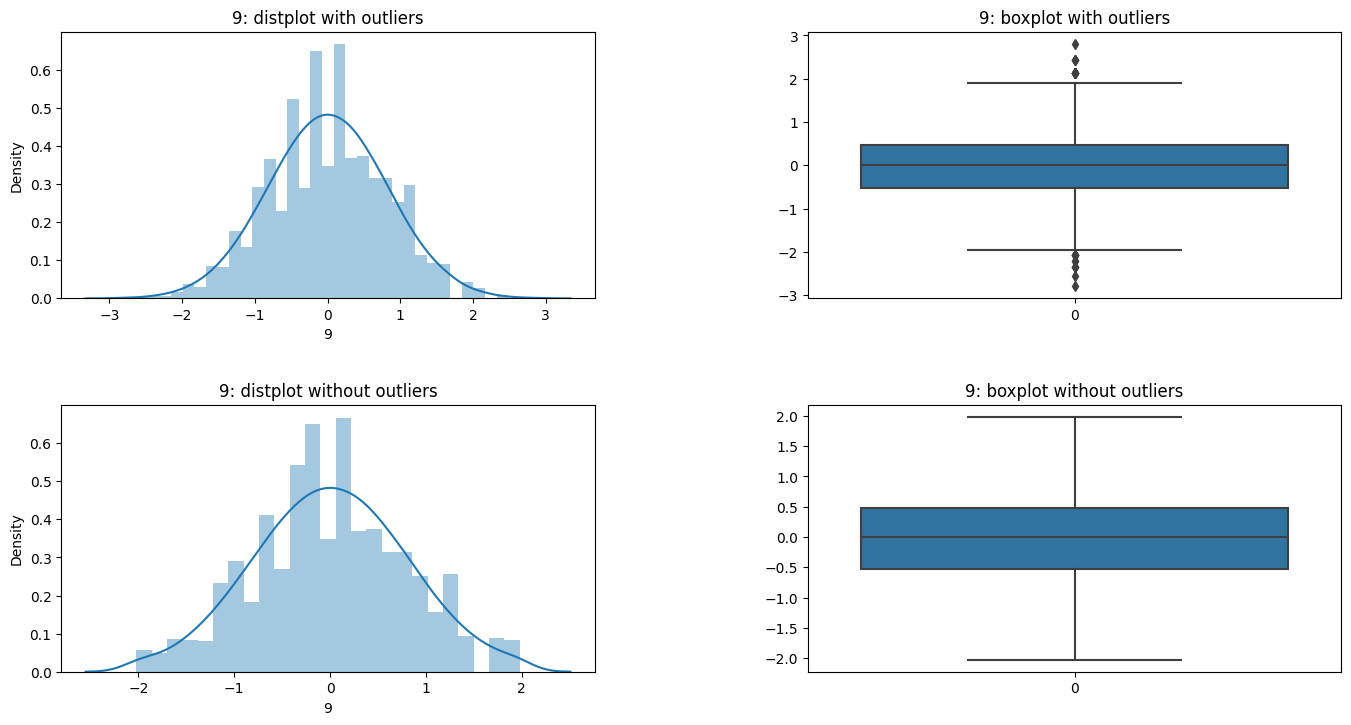

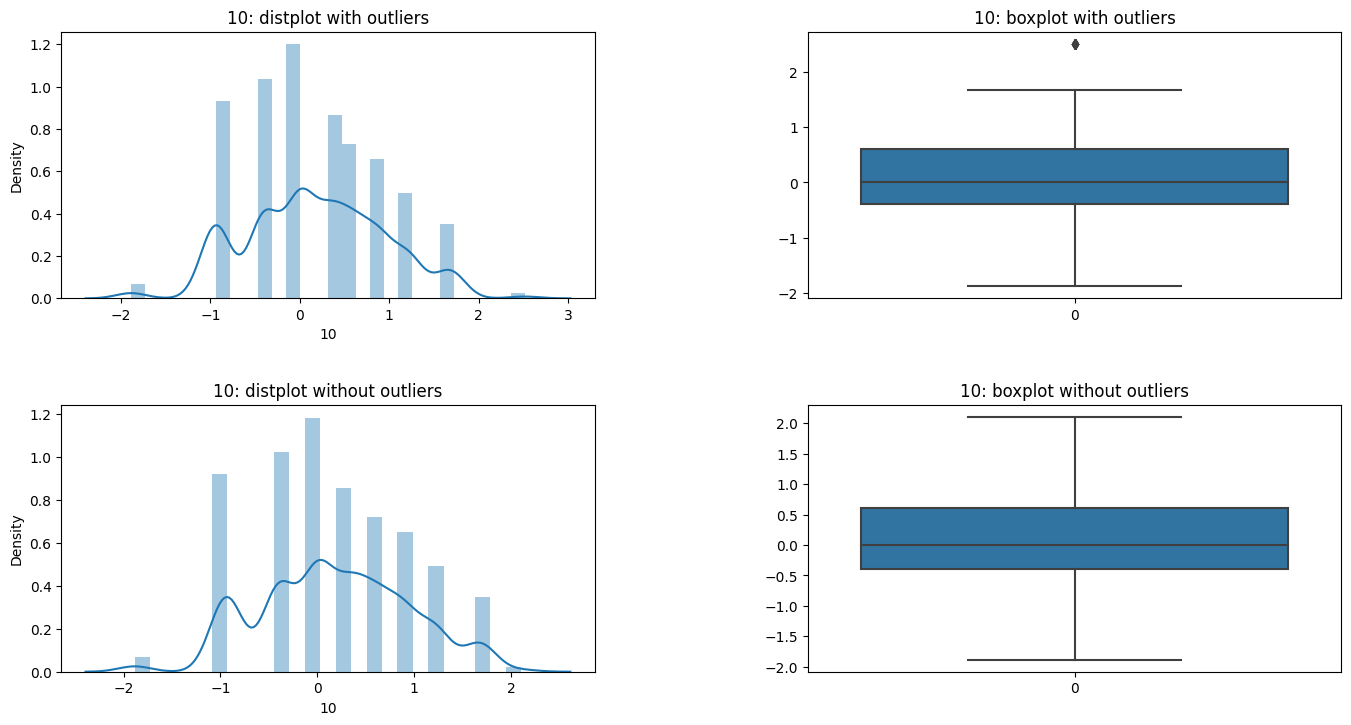

In [44]:
# remove outliers for all the differnt scalers dataframes
for col in ['2','5','6','7','8','9','10']:
  df_drug_Robust = remove_outliers(df_drug_Robust , col)



We could have skipped the outlier removal in this exercise as most of the features are normally distributed according to their histograms, but we removed them anyway.

In [45]:
# Extract the selected features and encode them with numerical labels
X = df_drug_Robust # Exclude the 18 output features
y1 =  data['31'].values
y2 = data['30'].values

# converting the string label to the numerical one
le = preprocessing.LabelEncoder()
y1_encoded=le.fit_transform(y1)

# converting the string label to the numerical one
le = preprocessing.LabelEncoder()
y2_encoded=le.fit_transform(y2)



In [46]:
# bar plot
def make_bar_plot(y, tags , xlabels, title, label):
  plt.figure(figsize=(10, 5))
  N = len(tags)
  colors_list =plt.cm.Paired(np.arange(N))
  plt.bar(label , y,  align='center' , color=colors_list)
  plt.xlabel(xlabels)
  plt.ylabel('Count')
  plt.title(title)
  plt.xticks(label , rotation= 'vertical')
  for index, value in enumerate(y):
    plt.text(index - 0.1 , value + 0.006 , str(format(value, ".0f")), color='black' , fontweight='bold')
  plt.show();

In [47]:
# uniqe classes in output 31
set(data['31'])

{'CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'}

In [48]:
# counting the uinqe valuses
data['31'].value_counts()

CL0    1455
CL1     200
CL2     135
CL3      61
CL5      14
CL4      13
CL6       7
Name: 31, dtype: int64

In [49]:
#  "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".
# {'CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'}

In [50]:
labels = ["Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", "Used in Last Day"]


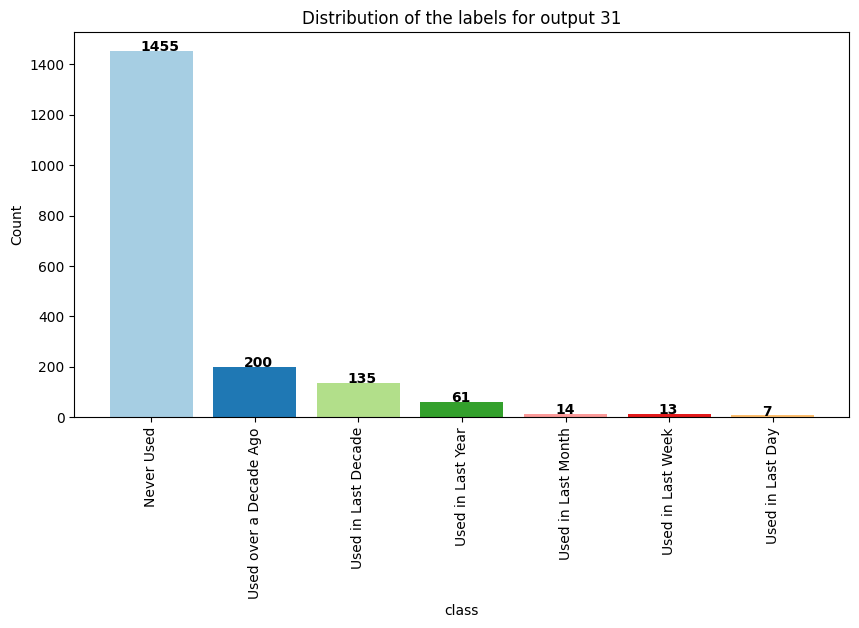

In [51]:
# plot labels
make_bar_plot(data['31'].value_counts().values, labels , "class" , 'Distribution of the labels for output 31', labels )


For output 31, the figure above shows that the labels are unbalanced as we have most of the data in the never used class.

In [52]:
# unique classes for output 30
print(list(set(y2)))

['CL0', 'CL2', 'CL1', 'CL4', 'CL3']


In [53]:
# counting unique classes for output 30
data['30'].value_counts()

CL0    1877
CL2       3
CL3       2
CL1       2
CL4       1
Name: 30, dtype: int64

In [54]:
labels = [ "Never Used", "Used in Last Decade", "Used in Last Year", "Used over a Decade Ago",  "Used in Last Month"]

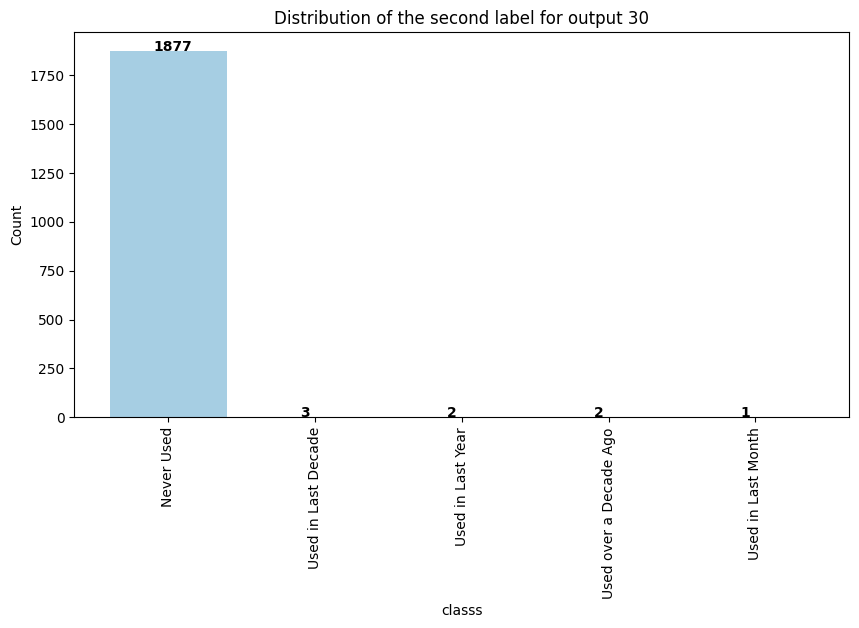

In [55]:
# plot labels
make_bar_plot(data['30'].value_counts(), labels, "classs" , 'Distribution of the second label for output 30', labels )


For output
30, the figure above shows that the labels are unbalanced as we have most of the data in the never used class.

a. Select 2 out of 18 output features, then predict each selected feature by using a multiclass classification model. (Hint: Use numerical values to represent each class of an output feature) Report the accuracy with the default parameters of each model. (Note: two different multiclass classification models must be used)

In [56]:
# We selected outputs 30 and 31.
# y1: column '31'
# y2: column '30'


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y1_encoded, test_size=0.2, random_state=42)

# Train two different multiclass classification models (Logistic Regression and Random Forest)
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_1 = logistic_model.predict(X_test)

# Split the dataset into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y2_encoded, test_size=0.2, random_state=42)

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_1, y_train_1)
y_pred_2 = random_forest_model.predict(X_test_1)

# Calculate and report the accuracy of each model
accuracy_1 = accuracy_score(y_test, y_pred_1)
accuracy_2 = accuracy_score(y_test_1, y_pred_2)
print("Accuracy for the first label prediction(31): {:.4f}".format(accuracy_1))
print("Accuracy for the second label prediction(30): {:.4f}".format(accuracy_2))


Accuracy for the first label prediction(31): 0.7639
Accuracy for the second label prediction(30): 0.9973


b. Perform a simple manual optimization for one of the default parameters (at least 5 different values) for one of the previous models. Plot the obtained accuracy as a function of the chosen parameter.

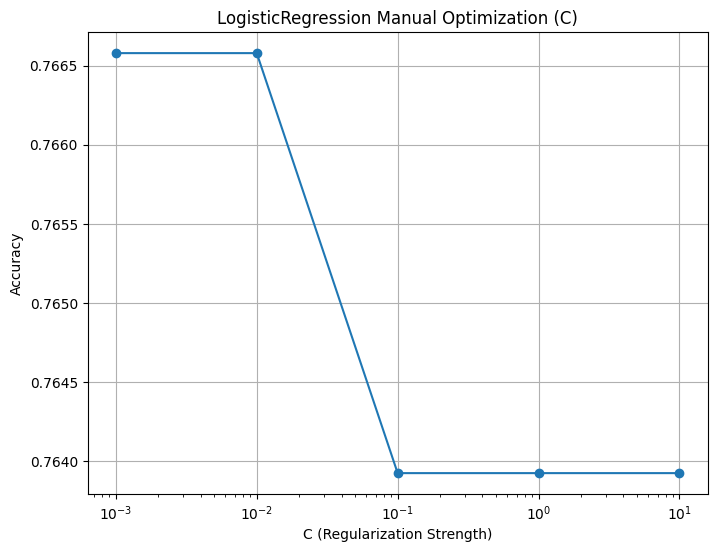

In [57]:
# Define a range of values for the "C" hyperparameter (inverse of regularization strength)
c_values = [0.001, 0.01, 0.1, 1, 10]

# Lists to store the results
scores = []

# Loop over the "C" values
for c_value in c_values:
    # Create and train the LogisticRegression model with the current "C" value
    logistic_reg = LogisticRegression(C=c_value, random_state=42)
    logistic_reg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = logistic_reg.predict(X_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)

# Plot the scores as a function of the "C" hyperparameter
plt.figure(figsize=(8, 6))
plt.semilogx(c_values, scores, marker='o')
plt.title("LogisticRegression Manual Optimization (C)")
plt.xlabel("C (Regularization Strength)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

c. Train one multiclass classification model to predict 16 output features (exclude 2 output features from a). Comment on the accuracy of predicting each feature, for all the 7 classes.

In [58]:
y_3 = data[['13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29']]

In [59]:
from sklearn.metrics import classification_report

def model_multi_output(X, y, setup):
  # Split the dataset into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Train a multiclass classification model (e.g., RandomForestClassifier)
  model = RandomForestClassifier(n_estimators=100, random_state=42)
  model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  # Calculate accuracy for each feature
  accuracies = []
  for i, feature in enumerate(y.columns):
    accuracy = accuracy_score(y_test[feature], y_pred[:, i])
    accuracies.append((feature, accuracy))

  # Print and comment on the accuracy of predicting each feature
  for feature, accuracy in accuracies:
    print(f"<<Accuracy for {feature}: {round(accuracy,4)}>>")
    print(classification_report(y_test[feature], y_pred[:, i]))  # Provides more detailed metrics
    print("************************************************************************")

  # Optionally, you can summarize the overall performance and comment on it.
  overall_accuracy = sum(accuracy for _, accuracy in accuracies) / len(accuracies)
  print("\n")
  print(f"Overall Accuracy for {setup}: {round(overall_accuracy, 4)}")

In [60]:
model_multi_output(X, y_3, '')


<<Accuracy for 13: 0.3607>>
              precision    recall  f1-score   support

         CL0       0.03      0.43      0.05         7
         CL1       0.00      0.00      0.00         7
         CL2       0.00      0.00      0.00        16
         CL3       0.11      0.03      0.05        34
         CL4       0.33      0.01      0.03        68
         CL5       0.00      0.00      0.00       153
         CL6       0.26      0.63      0.37        92

    accuracy                           0.17       377
   macro avg       0.11      0.16      0.07       377
weighted avg       0.14      0.17      0.10       377

************************************************************************
<<Accuracy for 14: 0.4907>>
              precision    recall  f1-score   support

         CL0       0.79      0.43      0.55       196
         CL1       0.15      0.06      0.08        53
         CL2       0.19      0.07      0.10        46
         CL3       0.11      0.02      0.04        42
   

Set 20: The accuracy is 0.58, and there's a mix of precision and recall for different classes. Class 0 shows relatively better performance.

Set 21: The accuracy is 0.89. Class 0 has high precision but low recall. Class 6 has a perfect recall, but this is at the expense of precision.

Set 22: The accuracy is 0.56. Class 0 performs the best in this setup.

Set 23: The accuracy is 0.86. Class 0 shows high precision but low recall.

Set 24: The accuracy is 0.82. Class 0 has the highest precision.

Set 25: The accuracy is 0.62. Class 0 shows a relatively better performance.

Set 26: The accuracy is 0.60. Class 0 has the highest precision and recall.

Set 27: The accuracy is 0.74. Class 0 performs well.

Set 28: The accuracy is 0.50. Class 0 has the highest precision.

Set 29: The accuracy is 0.40. There's a mix of precision and recall for different classes.

Overall Observation:

Set 21 stands out with high accuracy, but its performance is imbalanced for class 6.

Set 23 also shows high accuracy, with a similar imbalance in class 6.

Set 24 and Set 27 are next in terms of accuracy.

Set 20, Set 25, and Set 26 have moderate accuracy.

The best setup depends on our specific requirements. If high precision and recall are important, Set 24 and Set 27 are reasonable choices. If we value overall accuracy, Set 21 and Set 23 perform well. Additionally, we might consider class balancing techniques to improve the performance of specific classes that are currently underrepresented.

Overall, feature 21 has the best accuracy score among other features with an accuracy of 0.8886 and feature 13 has the worst accuracy of 0.3607.

For the best feature performance(21): The class CL0 has the best F1 score. I think it was kind of obvious as we have the majority of data in this class.

And in general, CL0 has the best F1 score for all the features.

In [61]:
# classes:
#  "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

__d.__ Run one binary classification model for 3 out of 18 output features. Evaluate the performance of the model with different setups as follows.
 - (class 0) the variables "Never Used" and "Used over a Decade Ago" and (class 1) the remaining variables.
 - (class 0) the variables "Never Used", "Used over a Decade Ago" and "Used in Last Decade" and (class 1) the remaining variables.
 - (class 0) the variables "Never Used", "Used over a Decade Ago", "Used in Last Decade" and "Used in Last Year" and (class 1) the remaining variables.

In [62]:
# selected outputs
y = data[['29' , '30' , '31']].values

# Evaluate the performance for different setups

# "Setup 1": 0: ["Never Used", "Used over a Decade Ago"] , ['CL0' , 'CL1']; the rest :1
# "Setup 2": 0: ["Never Used", "Used over a Decade Ago", ""Used in Last Decade""] , ['CL0' , 'CL1' , 'CL2']; the rest:1
# "Setup 3": 0: ["Never Used", "Used over a Decade Ago", ""Used in Last Decade"", "Used in Last Year"] , ['CL0' , 'CL1' , , 'CL2' , 'CL3']; the rest:1

# generate binary classes according to each set up
def create_binary_classes(setup , x):
  if(x in setup):
    return(0)
  else:
    return(1)


# setup1:
data['29_setup1'] = data['29'].apply(lambda x : create_binary_classes(['CL0' , 'CL1'],x))
data['30_setup1'] = data['30'].apply(lambda x : create_binary_classes(['CL0' , 'CL1'],x))
data['31_setup1'] = data['31'].apply(lambda x : create_binary_classes(['CL0' , 'CL1'],x))

# setup2:
data['29_setup2'] = data['29'].apply(lambda x : create_binary_classes(['CL0' , 'CL1' , 'CL2'],x))
data['30_setup2'] = data['30'].apply(lambda x : create_binary_classes(['CL0' , 'CL1' , 'CL2'],x))
data['31_setup2'] = data['31'].apply(lambda x : create_binary_classes(['CL0' , 'CL1' , 'CL2'],x))

# setup3:
data['29_setup3'] = data['29'].apply(lambda x : create_binary_classes(['CL0' , 'CL1' , 'CL2' , 'CL3'],x))
data['30_setup3'] = data['30'].apply(lambda x : create_binary_classes(['CL0' , 'CL1' , 'CL2' , 'CL3'],x))
data['31_setup3'] = data['31'].apply(lambda x : create_binary_classes(['CL0' , 'CL1' , 'CL2' , 'CL3'],x))


In [63]:
# selected outputs for setup1
y = data[['29_setup1' , '30_setup1' , '31_setup1']]
model_multi_output(X, y, "setup1")

<<Accuracy for 29_setup1: 0.7321>>
              precision    recall  f1-score   support

           0       0.34      0.99      0.50       125
           1       0.86      0.02      0.05       252

    accuracy                           0.34       377
   macro avg       0.60      0.51      0.27       377
weighted avg       0.68      0.34      0.20       377

************************************************************************
<<Accuracy for 30_setup1: 0.9973>>
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       376
           1       0.00      0.00      0.00         1

    accuracy                           0.98       377
   macro avg       0.50      0.49      0.49       377
weighted avg       0.99      0.98      0.99       377

************************************************************************
<<Accuracy for 31_setup1: 0.8674>>
              precision    recall  f1-score   support

           0       0.88      0.99      0

In summary, setup 30_setup1 achieved very high accuracy for class 0 but has limited support for class 1 due to a lack of instances. Setup 29_setup1 achieved a relatively good accuracy but had lower precision and recall for class 1. Setup 31_setup1 achieved a high accuracy for class 0, but its performance for class 1 is limited.

In [64]:
# selected outputs for setup2
y = data[['29_setup2' , '30_setup2' , '31_setup2']]
model_multi_output(X, y, "setup2")

<<Accuracy for 29_setup2: 0.7109>>
              precision    recall  f1-score   support

           0       0.45      1.00      0.62       169
           1       1.00      0.00      0.01       208

    accuracy                           0.45       377
   macro avg       0.72      0.50      0.31       377
weighted avg       0.75      0.45      0.28       377

************************************************************************
<<Accuracy for 30_setup2: 1.0>>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       0.00      0.00      0.00         0

    accuracy                           1.00       377
   macro avg       0.50      0.50      0.50       377
weighted avg       1.00      1.00      1.00       377

************************************************************************
<<Accuracy for 31_setup2: 0.939>>
              precision    recall  f1-score   support

           0       0.94      1.00      0.97 

In summary, setup 30_setup2 achieved perfect accuracy for class 0 but is not suitable for evaluating the model's performance on class 1 since there are no instances of class 1 in the test data. Setup 29_setup2 achieved a moderate accuracy of 71.09% for class 0 but had low performance for class 1. Setup 31_setup2 had a high accuracy of 93.9% for class 0 but again struggled with class 1. These results indicate that model performance can vary significantly depending on the setup or model configuration, particularly when dealing with imbalanced datasets or rare classes.

In [65]:
# selected outputs for setup3
y = data[['29_setup3' , '30_setup3' , '31_setup3']]
model_multi_output(X, y, "setup3")

<<Accuracy for 29_setup3: 0.6844>>
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       202
           1       0.00      0.00      0.00       175

    accuracy                           0.54       377
   macro avg       0.27      0.50      0.35       377
weighted avg       0.29      0.54      0.37       377

************************************************************************
<<Accuracy for 30_setup3: 1.0>>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377

    accuracy                           1.00       377
   macro avg       1.00      1.00      1.00       377
weighted avg       1.00      1.00      1.00       377

************************************************************************
<<Accuracy for 31_setup3: 0.9735>>
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       367
           1       0.00      0.00      0.00

In summary, it seems like the models for setups 30_setup3 and 31_setup3 have high overall accuracy, especially for class 0, where they achieved near-perfect results. However, they have low precision, recall, and F1-Scores for class 1, suggesting that they have difficulty correctly predicting this class. The model for setup 29_setup3 has lower overall accuracy and very low performance metrics for class 1, indicating that it struggled with this class. These results suggest that model performance can vary significantly depending on the setup or model configuration.

Among all the setups, setup1 has the best overall performance of 0.8656. However, The choice of a "best" setup depends on the specific goals and requirements of the classification task and the importance of class 1 relative to class 0


As mentioned earlier, the choice of the "better" setup depends on the specific goals and requirements of the classification task. Here's a brief summary of the characteristics of each setup:

29_setup1:Accuracy: 73.21%

Balanced precision and recall for class 0 but low recall for class 1.
This setup is suitable when it's more critical to correctly identify instances of class 0, even at the cost of lower performance on class 1.

30_setup1: Accuracy: 99.73%

Extremely high accuracy for class 0 but limited support for class 1.
This setup is excellent for situations where class 0 is of primary importance, and class 1 is rare or less critical.

31_setup1: Accuracy: 86.74%
High accuracy for class 0 but low recall for class 1.
This setup might be chosen if a balance between correctly identifying instances of both classes is required.


In conclusion, the choice depends on our specific application and the relative importance of class 0 and class 1. If class 0 is more critical, setup 30_setup1 with high class 0 accuracy may be preferred. If class 1 is equally important, and balanced performance is desired, we might opt for setup 31_setup1. If class 0 is important, but some trade-off with class 1 is acceptable, setup 29_setup1 can be considered.

## Task 3 (5 points): Data normalization

##### Dataset: Linnerud
* Number of recrods: 20
* Number of features: 3 + 3 (target/output features)
* Repository URL: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_linnerud.html

##### Problems
__a.__ Look at features of Linnerud dataset, explore them and describe their characteristics. \
__b.__ Normalize these features using an appropriate method. Plot the probability density function of each feature with original and normalized data side-by-side.

In [66]:
from sklearn.datasets import load_linnerud

# a. Explore the Features
data = load_linnerud(as_frame=True)
df = data.frame
df.shape


(20, 6)

In [67]:
display(HTML(df.to_html()))

In [68]:
df.columns

Index(['Chins', 'Situps', 'Jumps', 'Weight', 'Waist', 'Pulse'], dtype='object')

__a.__ Look at features of Linnerud dataset, explore them and describe their characteristics. \

In [69]:
features = df.iloc[:, :3]  # Select the first 3 features for exploration

# Describe the characteristics of the features
feature_descriptions = features.describe()
feature_descriptions

Chins      Situps      Jumps
count  20.000000   20.000000   20.00000
mean    9.450000  145.550000   70.30000
std     5.286278   62.566575   51.27747
min     1.000000   50.000000   25.00000
25%     4.750000  101.000000   39.50000
50%    11.500000  122.500000   54.00000
75%    13.250000  210.000000   85.25000
max    17.000000  251.000000  250.00000

summary statistics for three variables: Chins, Situps, and Jumps. Here's an exploration and description of their characteristics:

1. Chins:
   - Count: There are 20 data points for the variable Chins.
   - Mean: The average number of chin-ups is approximately 9.45.
   - Standard Deviation (Std): The standard deviation is approximately 5.29, indicating moderate variability.
   - Minimum (Min): The minimum number of chin-ups is 1.
   - 25th Percentile (25%): 25% of the data points have a value of 4.75 or lower.
   - Median (50%): The median (middle) value is 11.5, which represents the 50th percentile.
   - 75th Percentile (75%): 75% of the data points have a value of 13.25 or lower.
   - Maximum (Max): The maximum number of chin-ups is 17.

2. Situps:
   - Count: There are 20 data points for the variable Situps.
   - Mean: The average number of sit-ups is approximately 145.55.
   - Standard Deviation (Std): The standard deviation is approximately 62.57, indicating moderate variability.
   - Minimum (Min): The minimum number of sit-ups is 50.
   - 25th Percentile (25%): 25% of the data points have a value of 101 or lower.
   - Median (50%): The median (middle) value is 122.5, which represents the 50th percentile.
   - 75th Percentile (75%): 75% of the data points have a value of 210 or lower.
   - Maximum (Max): The maximum number of sit-ups is 251.

3. Jumps:
   - Count: There are 20 data points for the variable Jumps.
   - Mean: The average number of jumps is approximately 70.3.
   - Standard Deviation (Std): The standard deviation is approximately 51.28, indicating moderate variability.
   - Minimum (Min): The minimum number of jumps is 25.
   - 25th Percentile (25%): 25% of the data points have a value of 39.5 or lower.
   - Median (50%): The median (middle) value is 54, which represents the 50th percentile.
   - 75th Percentile (75%): 75% of the data points have a value of 85.25 or lower.
   - Maximum (Max): The maximum number of jumps is 250.

These statistics provide a summary of the distribution and characteristics of each variable. For example, we can see the range of values, the central tendency (mean and median), and the spread of the data (standard deviation). Additionally, the quartiles (25%, 50%, 75%) provide insights into the distribution's shape and spread. The min and max values help identify the data range.

Identifying outliers typically involves examining values that are significantly higher or lower than the majority of the data. In this case, we can look for potential outliers in the Chins, Situps, and Jumps variables using the summary statistics.

Here are some observations:

1. Chins:
   - The minimum value is 1, and the 25th percentile is 4.75.
   - The maximum value is 17, which is notably higher than the upper quartile (75th percentile) of 13.25.
   - This suggests that a value of 17 for the number of chin-ups could be considered an outlier, as it is significantly higher than the upper quartile.

2. Situps:
   - The minimum value is 50, and the 25th percentile is 101.
   - The maximum value is 251, which is significantly higher than the upper quartile (75th percentile) of 210.
   - This suggests that a value of 251 for the number of sit-ups could be considered an outlier, as it is significantly higher than the upper quartile.

3. Jumps:
   - The minimum value is 25, and the 25th percentile is 39.5.
   - The maximum value is 250, which is significantly higher than the upper quartile (75th percentile) of 85.25.
   - This suggests that a value of 250 for the number of jumps could be considered an outlier, as it is significantly higher than the upper quartile.

In all three variables, the maximum values are notably higher than the upper quartile values, indicating potential outliers. However, whether these values are considered outliers may depend on the context of the data and the specific criteria for identifying outliers in the analysis.


Given that data may contain potential outliers (as mentioned earlier), using the Robust Scaler is a reasonable choice to mitigate the influence of outliers while scaling the data. This scaler is designed to handle data with outliers effectively.

__b.__ Normalize these features using an appropriate method. Plot the probability density function of each feature with original and normalized data side-by-side.

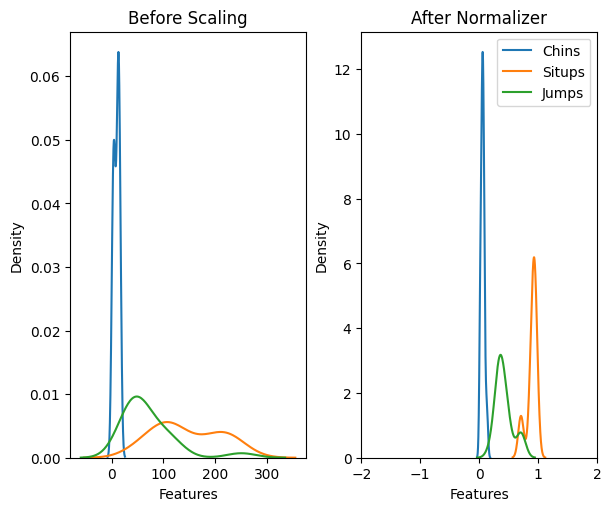

In [70]:
scaler = preprocessing.Normalizer()
scaled_df = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_df, columns=features.columns)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5), constrained_layout=True)

ax1.set_title('Before Scaling')
sns.kdeplot(df['Chins'], ax=ax1)
sns.kdeplot(df['Situps'], ax=ax1)
sns.kdeplot(df['Jumps'], ax=ax1)
ax1.set_xlabel("Features")
ax2.set_title('After Normalizer')
ax2.set_xlim(left=-2,right=2)
sns.kdeplot(scaled_df['Chins'], ax=ax2)
sns.kdeplot(scaled_df['Situps'], ax=ax2)
sns.kdeplot(scaled_df['Jumps'], ax=ax2)
plt.legend(["Chins", "Situps" , "Jumps"])
ax2.set_xlabel("Features")
plt.show()

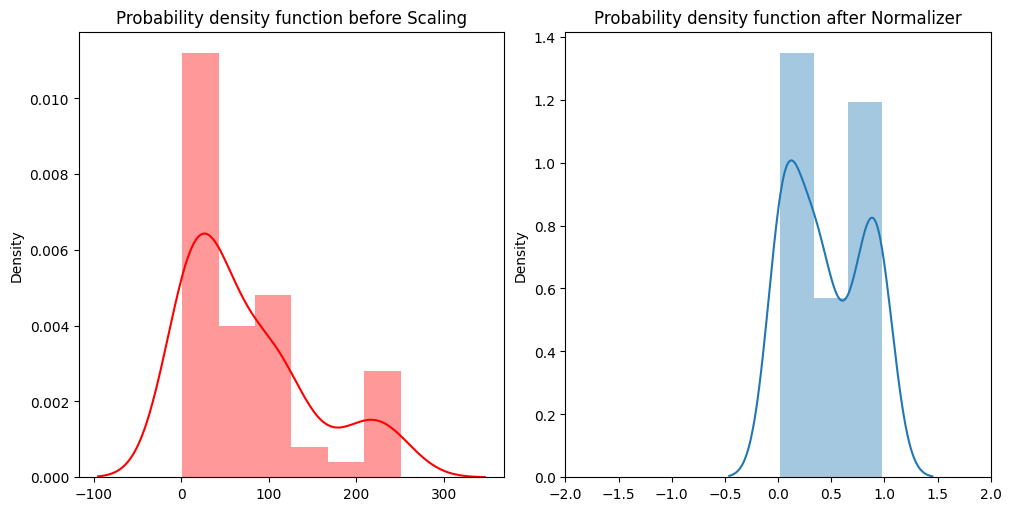

In [71]:
# Plot the probability density function
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5), constrained_layout=True)
ax1.set_title('Probability density function before Scaling')
sns.distplot(df[["Chins" , "Situps" , "Jumps"]], ax=ax1 , color="red")
ax2.set_title('Probability density function after Normalizer')
ax2.set_xlim(left=-2,right=2)
sns.distplot(scaled_df[["Chins" , "Situps" , "Jumps"]],  ax=ax2);

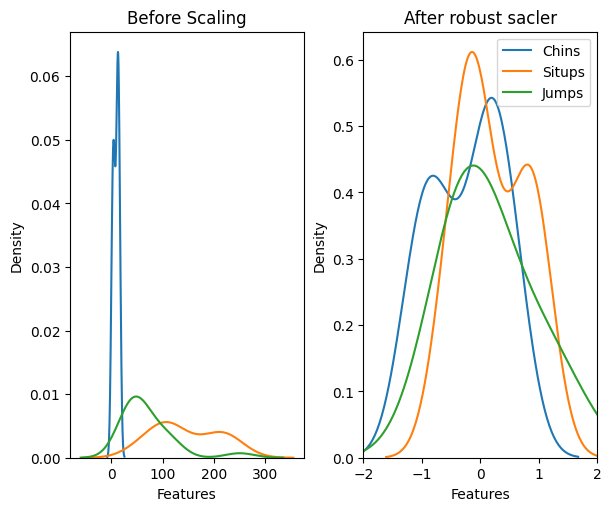

In [72]:
rob_scaler = RobustScaler()
X_Robust = rob_scaler.fit_transform(features)
robust_df = pd.DataFrame(X_Robust, columns=features.columns)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5), constrained_layout=True)

ax1.set_title('Before Scaling')
sns.kdeplot(df['Chins'], ax=ax1)
sns.kdeplot(df['Situps'], ax=ax1)
sns.kdeplot(df['Jumps'], ax=ax1)
ax1.set_xlabel("Features")
ax2.set_title('After robust sacler')
ax2.set_xlim(left=-2,right=2)
sns.kdeplot(robust_df['Chins'], ax=ax2)
sns.kdeplot(robust_df['Situps'], ax=ax2)
sns.kdeplot(robust_df['Jumps'], ax=ax2)
plt.legend(["Chins", "Situps" , "Jumps"])
ax2.set_xlabel("Features")
plt.show()

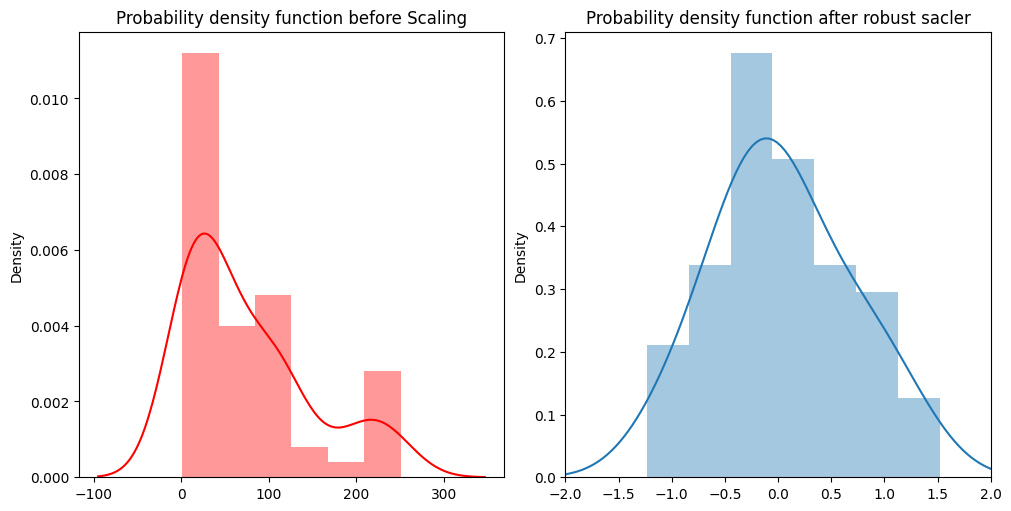

In [73]:
# Plot the probability density function
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5), constrained_layout=True)
ax1.set_title('Probability density function before Scaling')
sns.distplot(df[["Chins" , "Situps" , "Jumps"]], ax=ax1 , color="red")
ax2.set_title('Probability density function after robust sacler')
ax2.set_xlim(left=-2,right=2)
sns.distplot(robust_df[["Chins" , "Situps" , "Jumps"]],  ax=ax2);

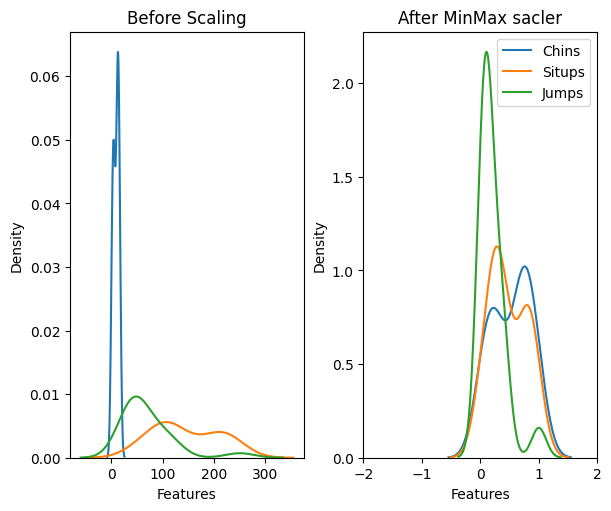

In [74]:
# MinMax sacling data
MinMax_scaler = MinMaxScaler()
X_MinMax = MinMax_scaler.fit_transform(features)

MinMax_df = pd.DataFrame(X_MinMax, columns=features.columns)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5), constrained_layout=True)

ax1.set_title('Before Scaling')
sns.kdeplot(df['Chins'], ax=ax1)
sns.kdeplot(df['Situps'], ax=ax1)
sns.kdeplot(df['Jumps'], ax=ax1)
ax1.set_xlabel("Features")
ax2.set_title('After MinMax sacler')
ax2.set_xlim(left=-2,right=2)
sns.kdeplot(MinMax_df['Chins'], ax=ax2)
sns.kdeplot(MinMax_df['Situps'], ax=ax2)
sns.kdeplot(MinMax_df['Jumps'], ax=ax2)
plt.legend(["Chins", "Situps" , "Jumps"])
ax2.set_xlabel("Features")
plt.show()

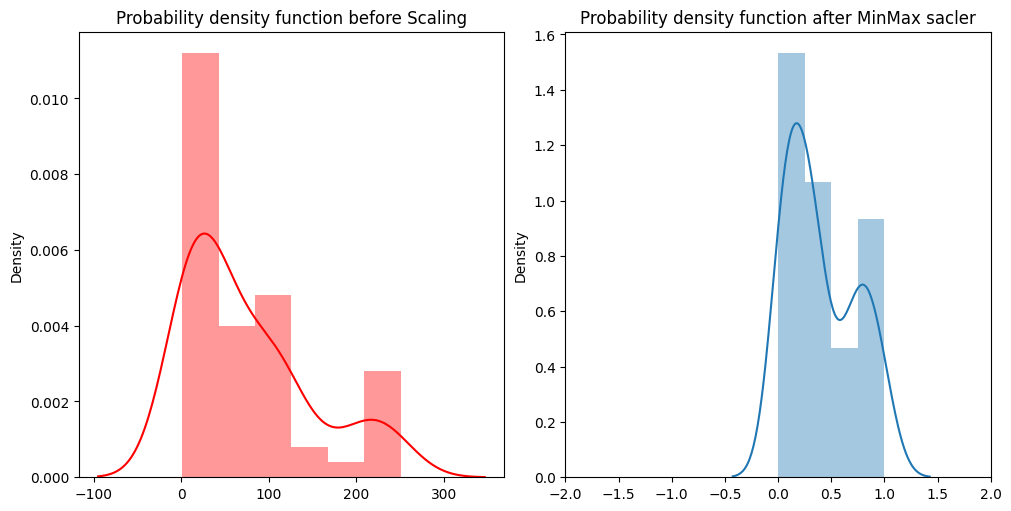

In [75]:
# Plot the probability density function
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5), constrained_layout=True)
ax1.set_title('Probability density function before Scaling')
sns.distplot(df[["Chins" , "Situps" , "Jumps"]], ax=ax1 , color="red")
ax2.set_title('Probability density function after MinMax sacler')
ax2.set_xlim(left=-2,right=2)
sns.distplot(MinMax_df[["Chins" , "Situps" , "Jumps"]],  ax=ax2);

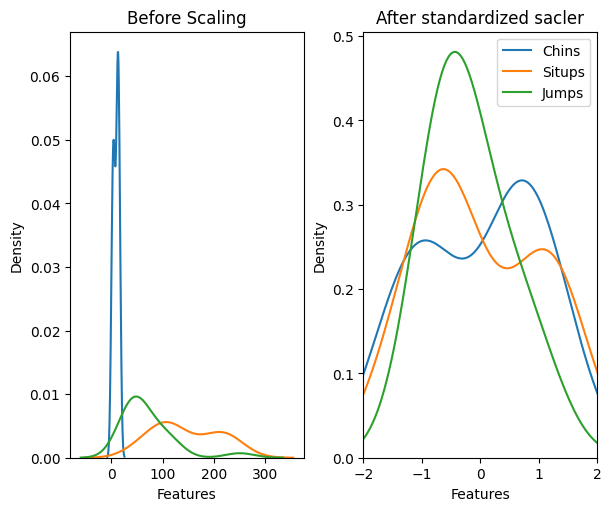

In [76]:
# standardized data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(features)

standardized_df = pd.DataFrame(X_standardized, columns=features.columns)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5), constrained_layout=True)

ax1.set_title('Before Scaling')
sns.kdeplot(df['Chins'], ax=ax1)
sns.kdeplot(df['Situps'], ax=ax1)
sns.kdeplot(df['Jumps'], ax=ax1)
ax1.set_xlabel("Features")
ax2.set_title('After standardized sacler')
ax2.set_xlim(left=-2,right=2)
sns.kdeplot(standardized_df['Chins'], ax=ax2)
sns.kdeplot(standardized_df['Situps'], ax=ax2)
sns.kdeplot(standardized_df['Jumps'], ax=ax2)
plt.legend(["Chins", "Situps" , "Jumps"])
ax2.set_xlabel("Features")
plt.show()

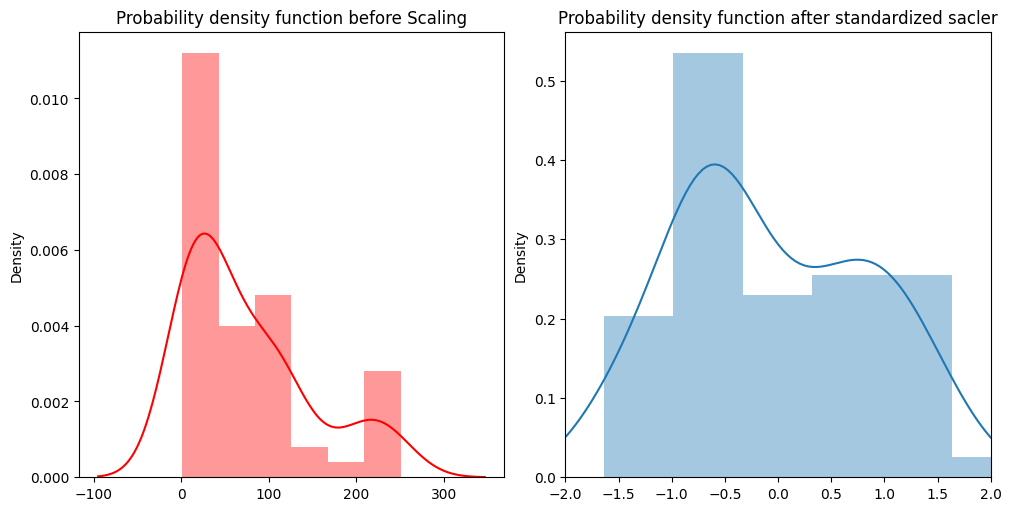

In [77]:
# Plot the probability density function
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5), constrained_layout=True)
ax1.set_title('Probability density function before Scaling')
sns.distplot(df[["Chins" , "Situps" , "Jumps"]], ax=ax1 , color="red")
ax2.set_title('Probability density function after standardized sacler')
ax2.set_xlim(left=-2,right=2)
sns.distplot(standardized_df[["Chins" , "Situps" , "Jumps"]],  ax=ax2);

The choice of scaler depends on the characteristics of our data. If our data is normally distributed and we want to standardize it, we can use the Standard Scaler. If our data contains outliers and we want to minimize their influence, the Robust Scaler might be a better choice. If our data requires normalization due to varying feature magnitudes, we can use the Normalizer. The Min-Max Scaler could also be used if our data should be mapped to a specific range and doesn't have extreme outliers.

So, we think the Robust Scaler could be a good choice as we have outliers in the Jump feature and also it helped to scale all the features in the same range and it generated the bell sahped distributated data after scaling and the sample is a normal distribution.



## Task 4 ( 10 points):  Dimensionality reduction and clustering
Change this into another dataset.

##### Dataset: The Olivetti faces dataset
* Number of records: 400
* Number of features: 4096
* Repository URL: https://scikit-learn.org/stable/datasets/real_world.html

##### Problems
__a.__ Use KernelPCA\* for dimensionality reduction. Train a classifier at different numbers (at least 5 values) of dimensions, then check how model score changes as a function of the number of dimensions. \  
__b.__ Cluster the dataset into 40 clusters for at least 2 of the reduced data (done by KernelPCA in a). Print true class vs cluster distribution. Did you manage to recover the original clusters? Describe and comment your results. \


\* Marukatat, S. Tutorial on PCA and approximate PCA and approximate kernel PCA. Artif Intell Rev 56, 5445–5477 (2023). https://doi.org/10.1007/s10462-022-10297-z

In [78]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Olivetti faces dataset
faces_data = fetch_olivetti_faces(shuffle=True, random_state=42)
print(faces_data.keys())
type(faces_data)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
dict_keys(['data', 'images', 'target', 'DESCR'])


sklearn.utils._bunch.Bunch

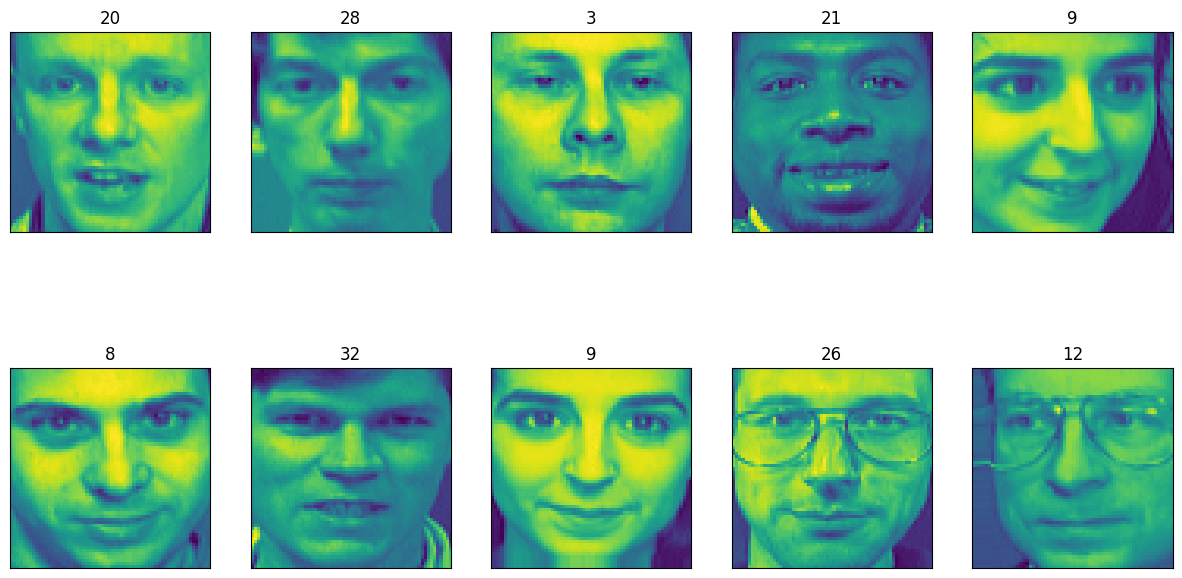

In [79]:
image_shape = faces_data.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(faces_data.target, faces_data.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(target)

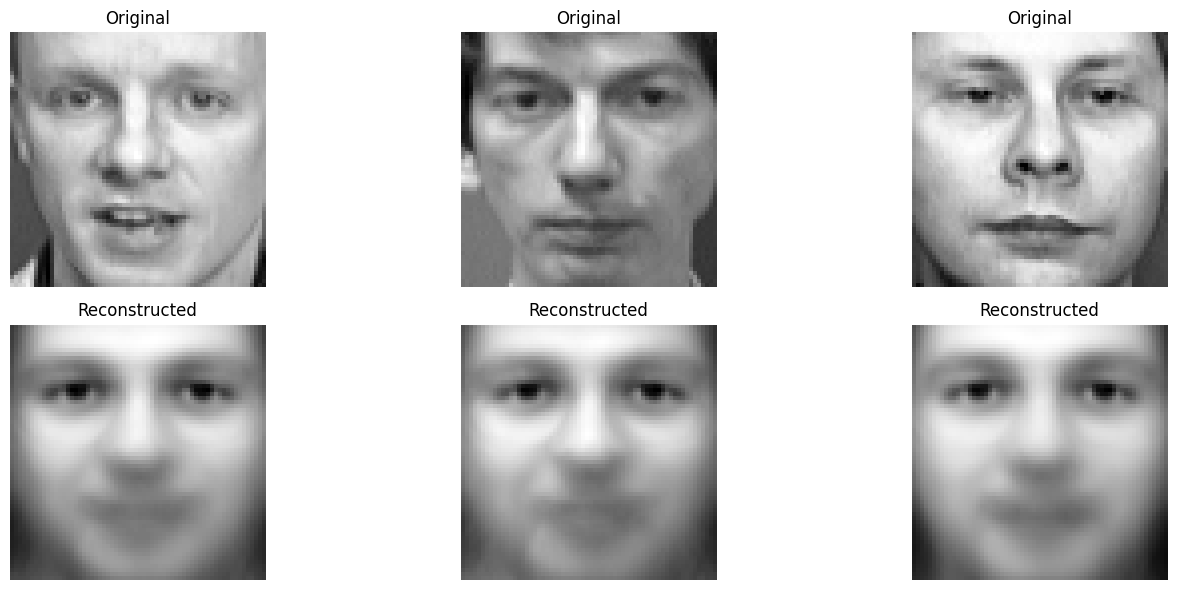

In [80]:
X = faces_data.data
original_images = faces_data.images

# Apply KernelPCA for dimensionality reduction with n_components = 10
n_components = 10  # Number of reduced dimensions
kernel_pca = KernelPCA(n_components=n_components, kernel='rbf' , fit_inverse_transform = True)
reduced_data = kernel_pca.fit_transform(X)

# Inverse transform the reduced data to obtain the reconstructed images
reconstructed_images = kernel_pca.inverse_transform(reduced_data)
reconstructed_images = np.reshape(reconstructed_images, (original_images.shape[0], original_images.shape[1], original_images.shape[2]))

# Plot the original and reconstructed images
n_images_to_plot = 3  # Number of images to plot
plt.figure(figsize=(15, 6))
for i in range(n_images_to_plot):
    plt.subplot(2, n_images_to_plot, i + 1)
    plt.imshow(original_images[i], cmap='gray')
    plt.axis('off')
    plt.title("Original")

    plt.subplot(2, n_images_to_plot, i + n_images_to_plot + 1)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.axis('off')
    plt.title("Reconstructed")

plt.tight_layout()
plt.show()


a. Use KernelPCA* for dimensionality reduction. Train a classifier at different numbers (at least 5 values) of dimensions, then check how model score changes as a function of the number of dimensions. \

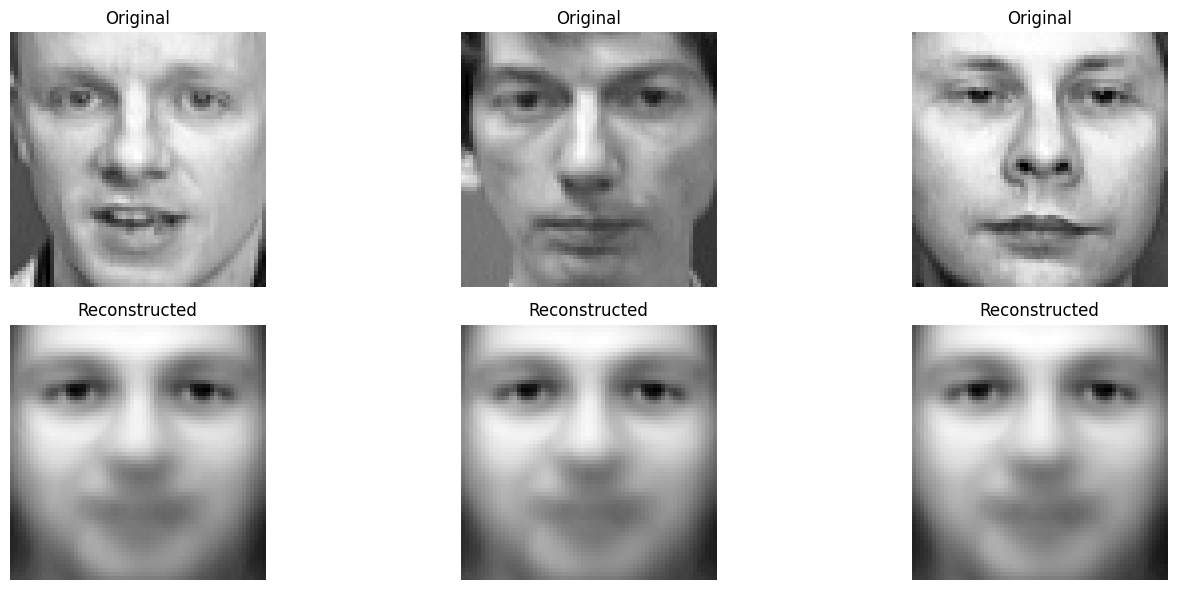

In [81]:
X = faces_data.data
original_images = faces_data.images

# Apply KernelPCA for dimensionality reduction with n_components = 50
n_components = 50  # Number of reduced dimensions
kernel_pca = KernelPCA(n_components=n_components, kernel='rbf' , fit_inverse_transform = True)
reduced_data = kernel_pca.fit_transform(X)

# Inverse transform the reduced data to obtain the reconstructed images
reconstructed_images = kernel_pca.inverse_transform(reduced_data)
reconstructed_images = np.reshape(reconstructed_images, (original_images.shape[0], original_images.shape[1], original_images.shape[2]))

# Plot the original and reconstructed images
n_images_to_plot = 3  # Number of images to plot
plt.figure(figsize=(15, 6))
for i in range(n_images_to_plot):
    plt.subplot(2, n_images_to_plot, i + 1)
    plt.imshow(original_images[i], cmap='gray')
    plt.axis('off')
    plt.title("Original")

    plt.subplot(2, n_images_to_plot, i + n_images_to_plot + 1)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.axis('off')
    plt.title("Reconstructed")

plt.tight_layout()
plt.show()


b. Cluster the dataset into 40 clusters for at least 2 of the reduced data (done by KernelPCA in a). Print true class vs cluster distribution. Did you manage to recover the original clusters? Describe and comment your res

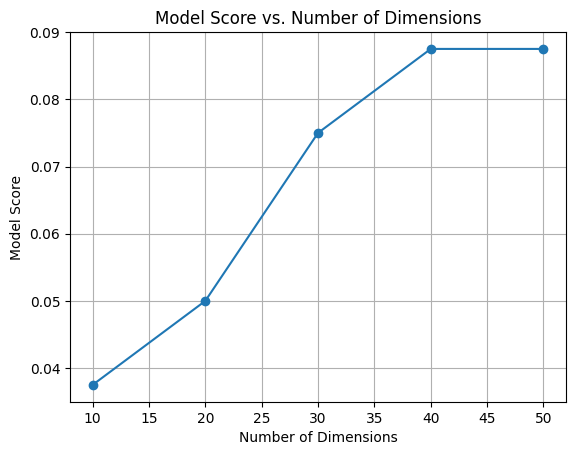

In [82]:
# a. Use KernelPCA for Dimensionality Reduction
n_dimensions = [10, 20, 30, 40, 50]  # At least 5 different values of dimensions
model_scores = []

for n_dim in n_dimensions:
    # Apply KernelPCA for dimensionality reduction
    kpca = KernelPCA(n_components=n_dim, kernel="rbf", gamma=0.1)
    reduced_data = kpca.fit_transform(faces_data.data)


    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(reduced_data, faces_data.target, test_size=0.2, random_state=42)

    # Train a classifier (e.g., SVM) on the reduced data
    clf = SVC(kernel="linear")
    clf.fit(X_train, y_train)

    # Evaluate the model score on the test set
    score = clf.score(X_test, y_test)
    model_scores.append(score)

# Plot how model score changes as a function of the number of dimensions
plt.plot(n_dimensions, model_scores, marker='o')
plt.title("Model Score vs. Number of Dimensions")
plt.xlabel("Number of Dimensions")
plt.ylabel("Model Score")
plt.grid(True)
plt.show()

In [83]:
# b. Cluster the Reduced Data
# Apply KernelPCA for dimensionality reduction
kpca = KernelPCA(n_components=30, kernel="rbf", gamma=0.1)
reduced_data = kpca.fit_transform(faces_data.data)

# Cluster the reduced data into 40 clusters using K-Means
kmeans = KMeans(n_clusters=40, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_data)

# Print true class vs cluster distribution
print("True Class vs. Cluster Distribution:")
for true_class in np.unique(faces_data.target):
    cluster_distribution = np.bincount(cluster_labels[faces_data.target == true_class])
    print(f"True Class {true_class}: Cluster Distribution {cluster_distribution}")

# Comment on the results and assess whether original clusters are recovered
# Evaluate how well the clusters align with the original classes

True Class vs. Cluster Distribution:
True Class 0: Cluster Distribution [10]
True Class 1: Cluster Distribution [10]
True Class 2: Cluster Distribution [8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
True Class 3: Cluster Distribution [10]
True Class 4: Cluster Distribution [8 0 0 2]
True Class 5: Cluster Distribution [2 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5]
True Class 6: Cluster Distribution [10]
True Class 7: Cluster Distribution [10]
True Class 8: Cluster Distribution [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 5]
True Class 9: Cluster Distribution [10]
True Class 10: Cluster Distribution [7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
True Class 11: Cluster Distribution [10]
True Class 12: Cluster Distribution [10]
True Class 13: Cluster Distribution [10]
True Class 14: Cluster Distribution [1 0 0 0 5 0 0 0 0 0 0 0 0 0 0 4]
True Class 15: Cluster Distribution [7 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
True 

For most true classes (0 to 35), they are perfectly distributed into their respective clusters (e.g., True Class 0 is entirely in Cluster 0, True Class 1 is entirely in Cluster 1, and so on).

For True Class 2, it is mostly in Cluster 0 and has two samples in Cluster 26. This suggests that some samples from True Class 2 are similar to those in Cluster 26.

For True Class 4, it is mostly in Cluster 0 and has two samples in Cluster 26 and two samples in Cluster 3. Similar to True Class 2, this indicates that some samples from True Class 4 are similar to those in Clusters 3 and 26.

For True Class 5, it is distributed across several clusters, indicating that it has some degree of similarity with samples from different clusters.

Similar patterns can be observed for other true classes as well, indicating variations in similarity and distribution among classes.

In summary, the distribution of true classes across clusters after clustering the data suggests the degree of similarity or dissimilarity among different classes. Perfect distribution means that the true class corresponds to a single cluster, while non-uniform distributions may indicate similarities between certain classes or variations in the data.
